<img src="images.png" width=1200 height=1200 />

<h1 align='center'> <font color='red'><font size=7>LoanTap - Logistic Regression </font> </font></h1>

## **Context:**
LoanTap is an one platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.
The df science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
1. Personal Loan
2. EMI Free Loan
3. Personal Overdraft
4. Advance Salary Loan

## **Problem Statement:**
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?
------
        
### 📃 Features of the dataset:

- Column Profiling:

| Feature | Description |
|:--------|:------------|
| loan_amnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value|
| term | The number of payments on the loan. Values are in months and can be either 36 or 60|
| int_rate | Interest Rate on the loan|
| installment | The monthly payment owed by the borrower if the loan originates|
| grade | LoanTap assigned loan grade|
| sub_grade | LoanTap assigned loan subgrade|
| emp_title |The job title supplied by the Borrower when applying for the loan|
| emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|
| home_ownership | The home ownership status provided by the borrower during registration or obtained from the credit report|
| annual_inc | The self-reported annual income provided by the borrower during registration|
| verification_status | Indicates if income was verified by LoanTap, not verified, or if the income source was verified|
| issue_d | The month which the loan was funded|
| loan_status | Current status of the loan - Target Variable|
| purpose | A category provided by the borrower for the loan request|
| title | The loan title provided by the borrower|
| dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income|
| earliest_cr_line |The month the borrower's earliest reported credit line was opened|
| open_acc | The number of open credit lines in the borrower's credit file|
| pub_rec | Number of derogatory public records|
| revol_bal | Total credit revolving balance|
| revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit|
| total_acc | The total number of credit lines currently in the borrower's credit file|
| initial_list_status | The initial listing status of the loan| Possible values are – W, F|
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers|
| mort_acc | Number of mortgage accounts|
| pub_rec_bankruptcies | Number of public record bankruptcies|
| Address| Address of the individual|

----

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay,f1_score,recall_score,precision_score)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("logistic_regression.csv")

In [3]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [4]:
# Top 5 rows of the dfframe
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.shape

(396030, 27)

In [7]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### <span style="color:seagreen"><strong>Insights:</strong></span>
- There are 396030 rows and 27 columns
- Data contains some missing values
- Data will require some preprocessing like handling null values, outliers, data types...etc which will be taken care in the following section

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


### <span style="color:seagreen"><strong>Insights:</strong></span>

**Outliers:** The significant differences between mean & median in key attributes like loan amount and revolving balance indicate potential outliers.

**Loan Duration Preference:** A preference for 36-month loan terms among borrowers suggests a balance between manageable installments.

**Home Ownership Trends:** The prevalence of applicants with mortgaged homes suggests financial stability or a need for substantial, property-secured loans.

**Successful Loan Repayment:** Most loans being fully paid off reflects positively on borrowers' financial commitment, indicating effective lending criteria.

**Debt Consolidation Dominance:** The primary use of loans for debt consolidation highlights a common strategy to manage or reduce high-interest debt.

**Individual Borrowers:** The predominance of individual applicants suggests that personal loans are a major market segment.

### 📜📜**Duplicate Detection**

In [9]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


### <span style="color:seagreen"><strong>Insights:</strong></span>

- The dataset does not contain any duplicates.
-----
### **Null Detection**

In [10]:
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [11]:
def missing_data(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isna().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

missing_pct = missing_data(df)
missing_pct

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1756,0.443401
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692
loan_amnt,0,0.000000
dti,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000


### <span style="color:seagreen"><strong>Insights:</strong></span>

> Following columns has missing values
1. emp_title has 5.78% missing values
2. emp_length has 4.62% missing values
3. title has 0.44% missing values
4. revol_until has 0.06% missing values
5. mort_acc has 9.54% missing values
6. pub_rec_bankruptcies has 0.13% missing values

> Action  

- Since ML algorithm do not work on columns which has missing values so we need to impute these missing values.

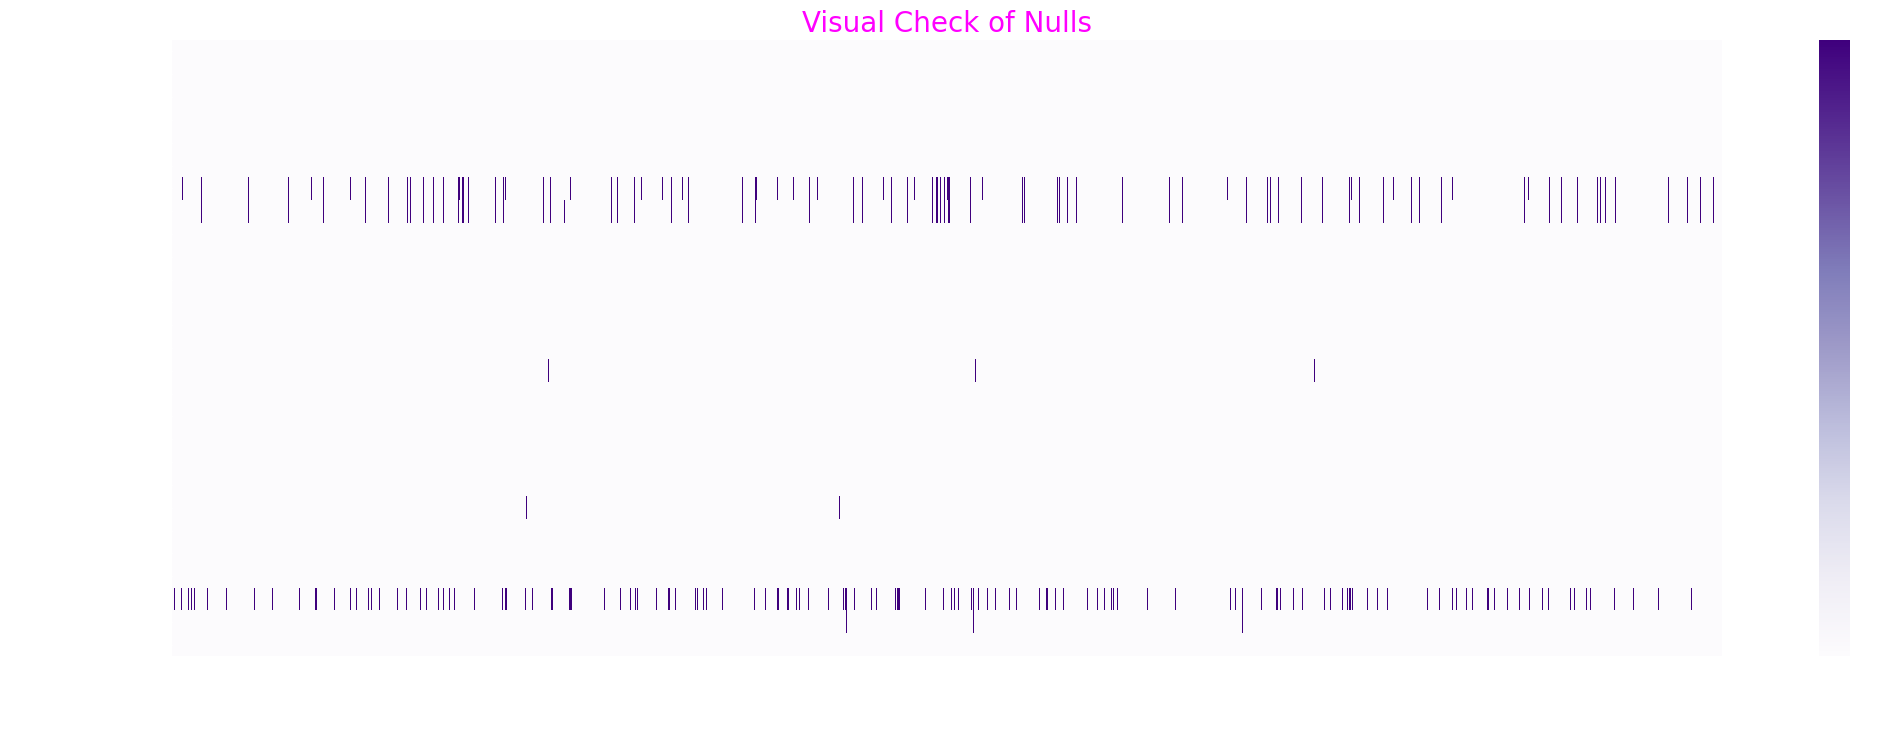

In [12]:
plt.figure(figsize=(25,8))
plt.style.use('dark_background')
sns.heatmap(df.isnull().T,cmap='Purples')
plt.title('Visual Check of Nulls',fontsize=20,color='magenta')
plt.show()

In [13]:
df.isna().sum().sum()
# since there are 81590 rows are null , we cant drop na ...

81590

In [14]:
num_cols = df.select_dtypes(exclude=['object'])
num_cols

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


In [15]:
for _ in num_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {df[_].unique()}')
    print(f'Value_counts of {_} column :-\n {df[_].value_counts(normalize=True)*100}')
    print()
    print('-'*120)


Total Unique Values in loan_amnt column are :- 1397
Unique Values in loan_amnt column are :-
 [10000.  8000. 15600. ... 36275. 36475.   725.]
Value_counts of loan_amnt column :-
 loan_amnt
10000.0    6.986339
12000.0    5.395046
15000.0    5.025629
20000.0    4.789789
35000.0    3.680529
             ...   
36225.0    0.000253
950.0      0.000253
37800.0    0.000253
30050.0    0.000253
725.0      0.000253
Name: proportion, Length: 1397, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in int_rate column are :- 566
Unique Values in int_rate column are :-
 [11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 

In [16]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [17]:
for _ in cat_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Unique Values in {_} column are :-\n {df[_].unique()}')
    print(f'Value_counts of {_} column :-\n {df[_].value_counts(normalize=True)*100}')
    print()
    print('-'*120)


Total Unique Values in term column are :- 2
Unique Values in term column are :-
 [' 36 months' ' 60 months']
Value_counts of term column :-
 term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in grade column are :- 7
Unique Values in grade column are :-
 ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Value_counts of grade column :-
 grade
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in sub_grade column are :- 35
Unique Values in sub_grade column are :-
 ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 '

In [18]:
# Using a dictionary to map column names to default values for `fillna`
default_values = {
    'revol_util': 0.0,
    'mort_acc': 0.0,
    'pub_rec_bankruptcies': 0.0,
    'emp_title': 'No Employee Title',
    'title': 'Unavailable',
    'emp_length': '< 1 year'
}

# Applying `fillna` for all columns in a loop
for column, default_value in default_values.items():
    df[column] = df[column].fillna(default_value)


In [19]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [20]:
num_cols.skew()

loan_amnt                 0.777285
int_rate                  0.420669
installment               0.983598
annual_inc               41.042725
dti                     431.051225
open_acc                  1.213019
pub_rec                  16.576564
revol_bal                11.727515
revol_util               -0.071778
total_acc                 0.864328
mort_acc                  1.600132
pub_rec_bankruptcies      3.423440
dtype: float64

In [21]:
#Convert columns with less number of unique values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

## 🔖Q1. What percentage of customers have fully paid their Loan Amount?

In [22]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

### <span style="color:seagreen"><strong>Insights:</strong></span>

- Target variable distribution is 80%-20%. Data is **`significantly imbalanced`**

### Univarate Analysis

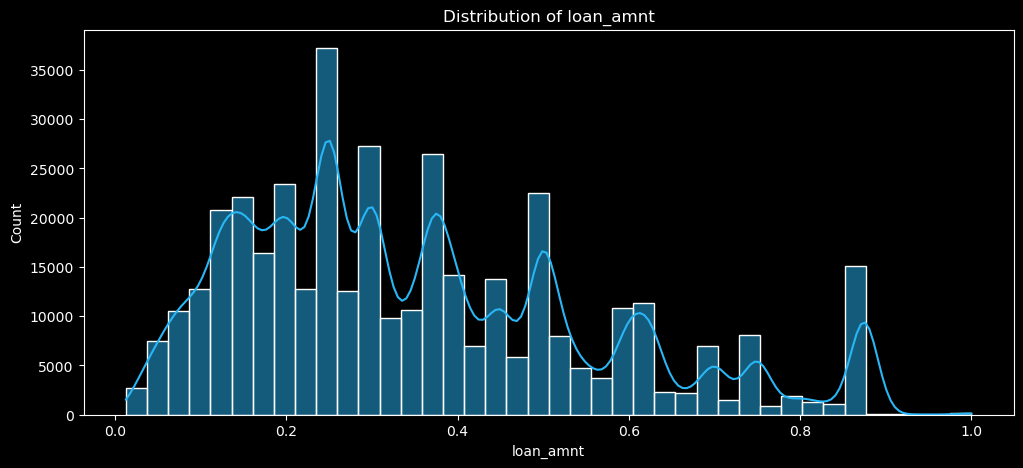

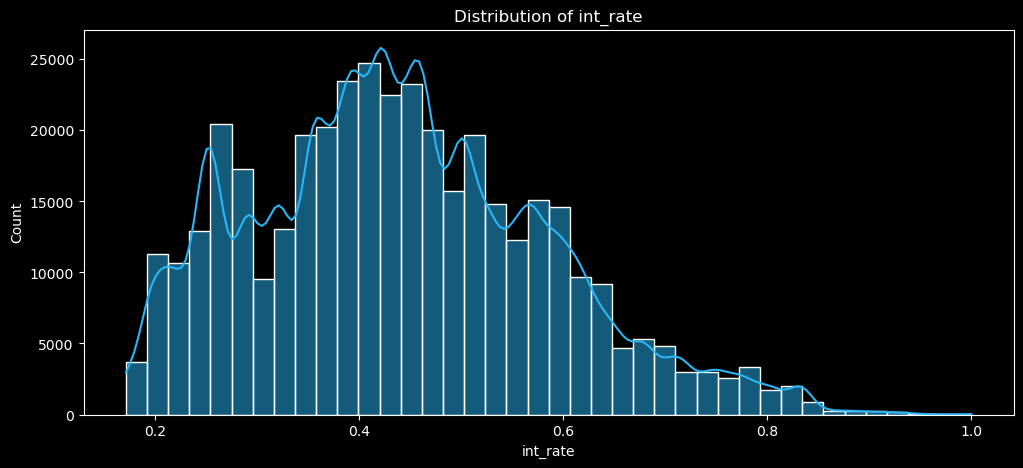

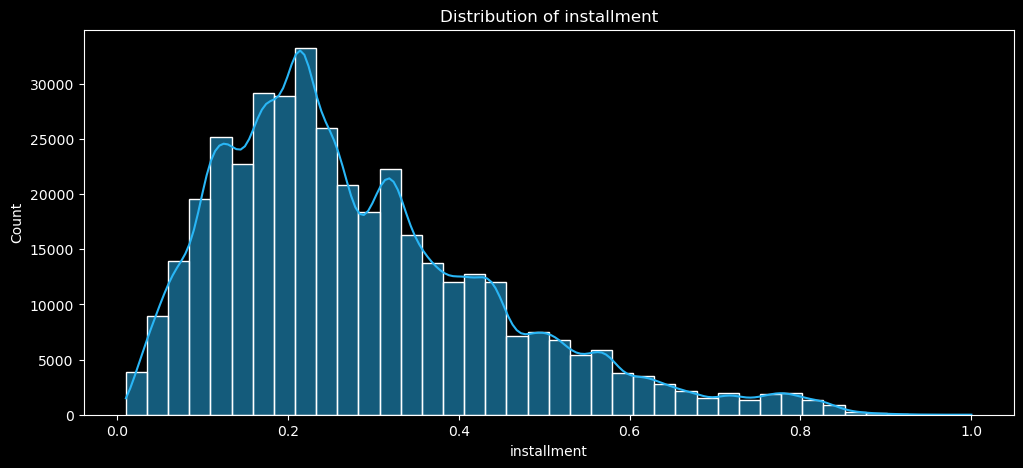

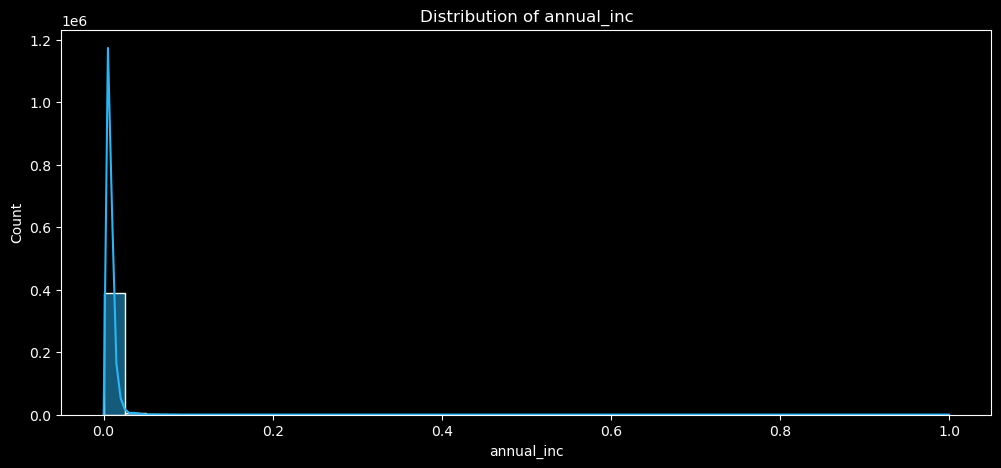

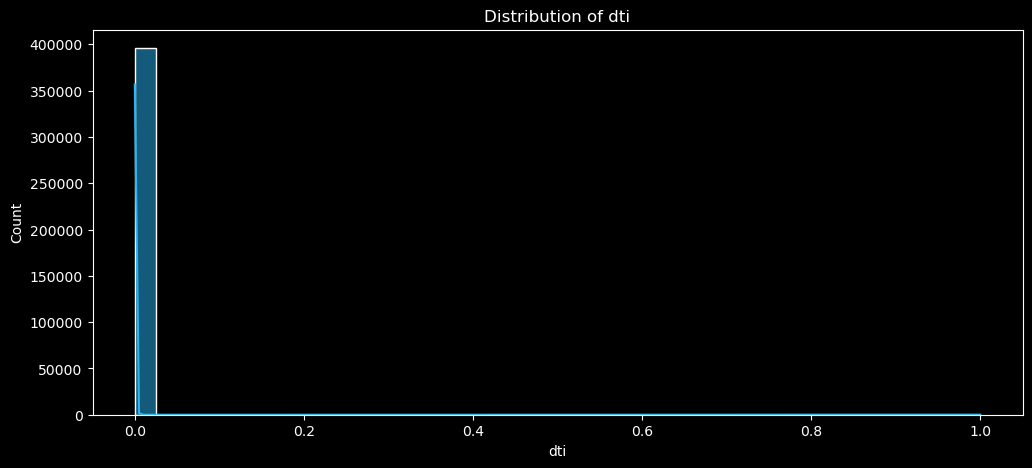

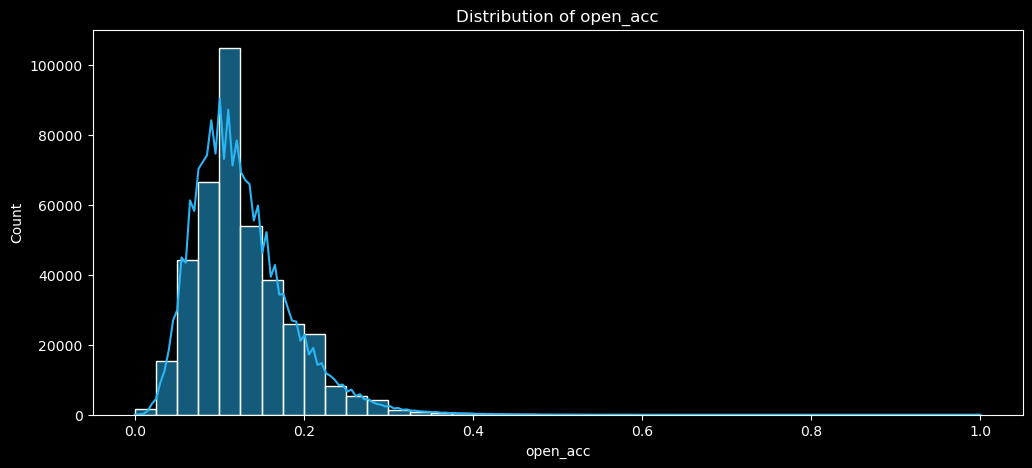

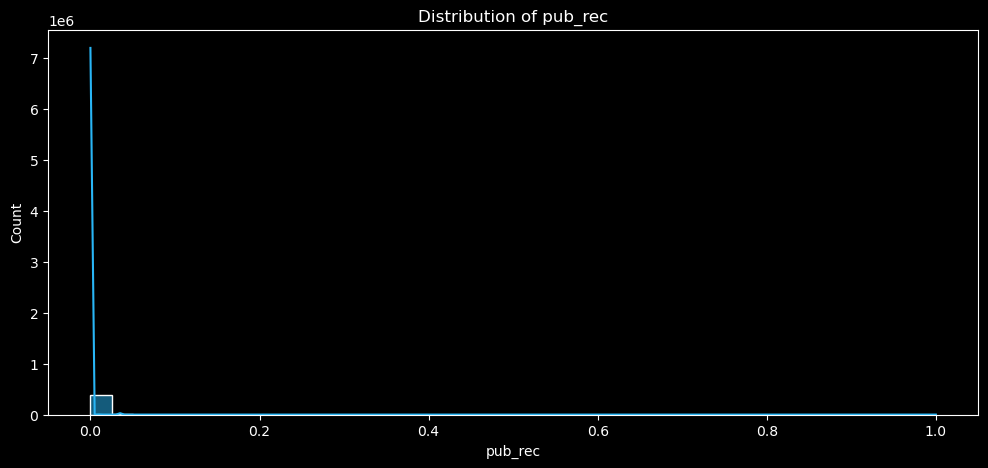

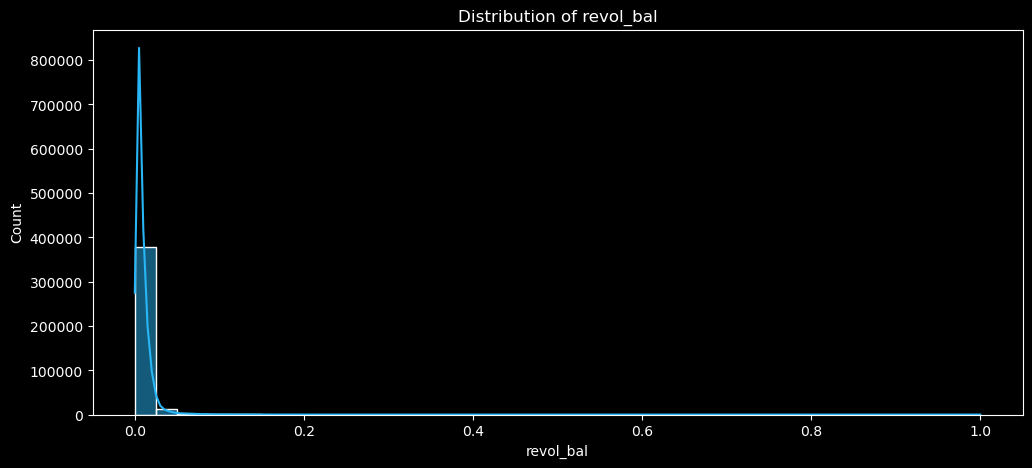

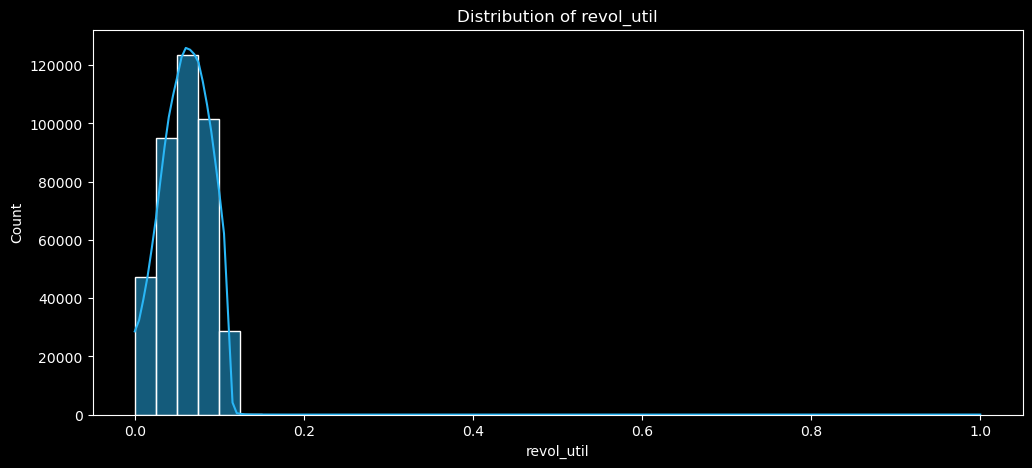

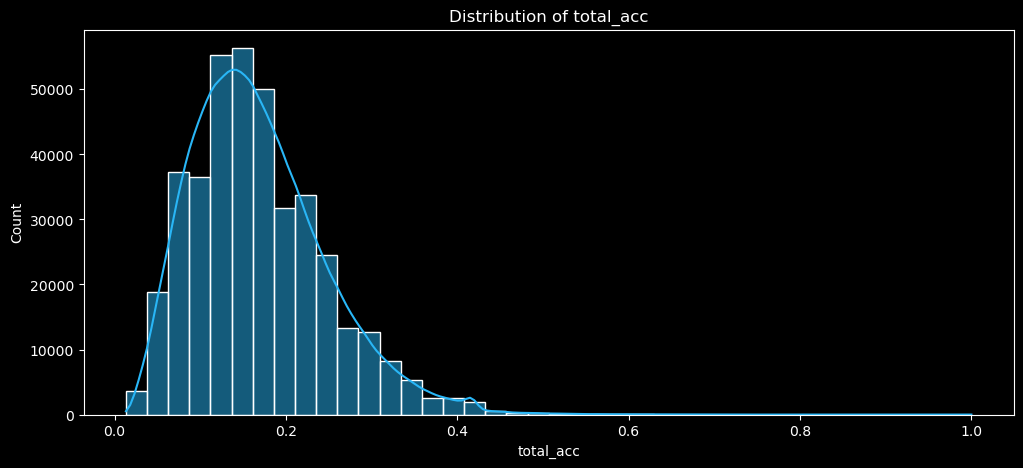

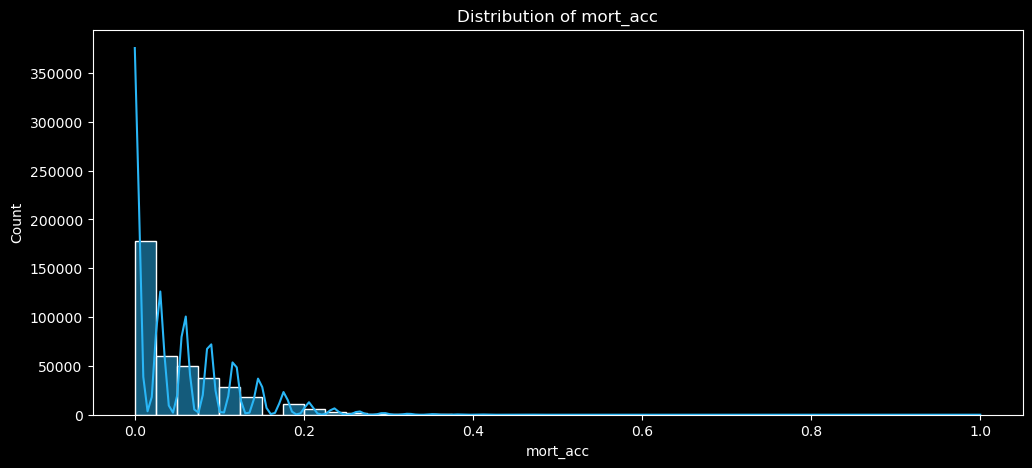

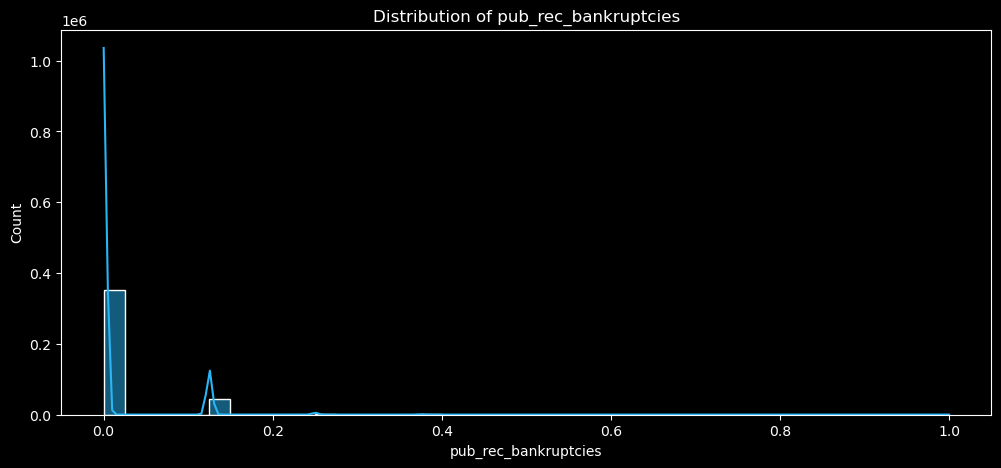

In [23]:

for i in num_cols:
    plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True,color="#29B6F6", bins=40)
    plt.show()

In [24]:
cat_cols = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

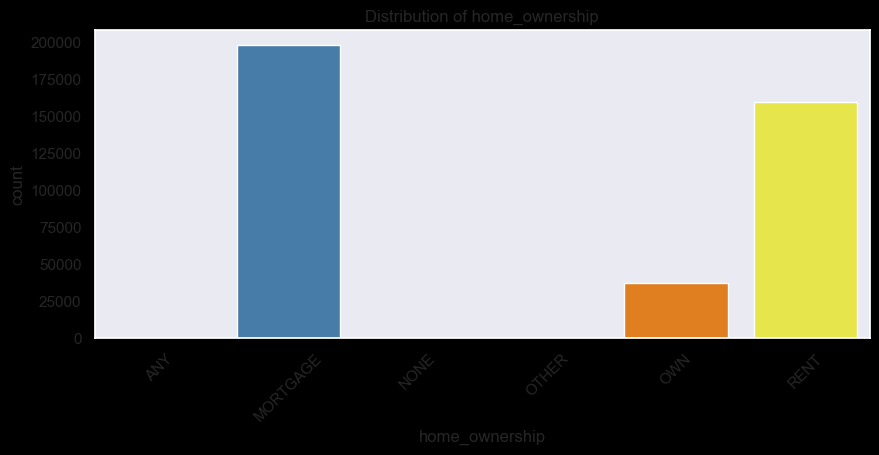

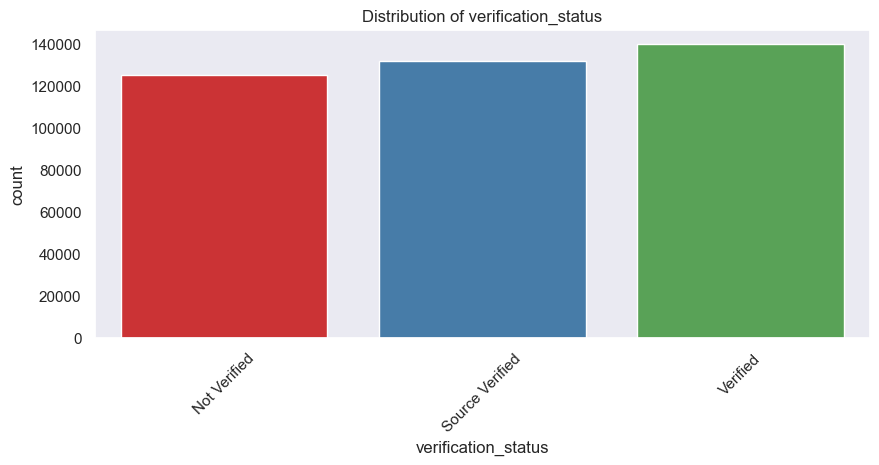

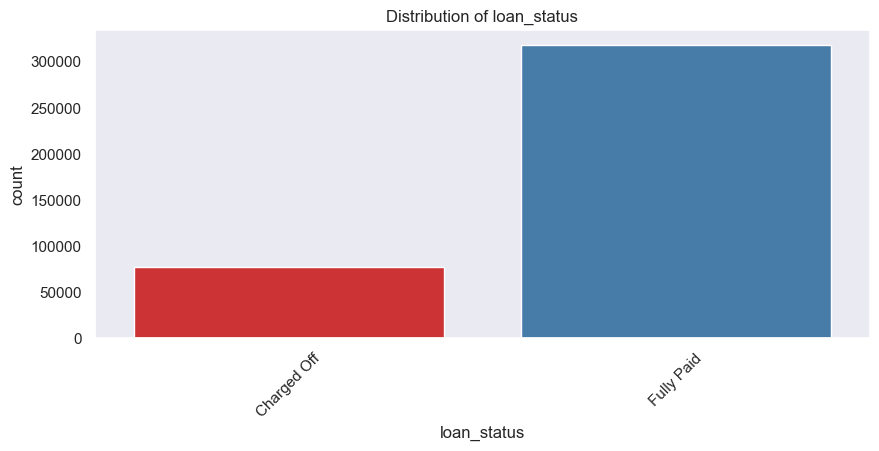

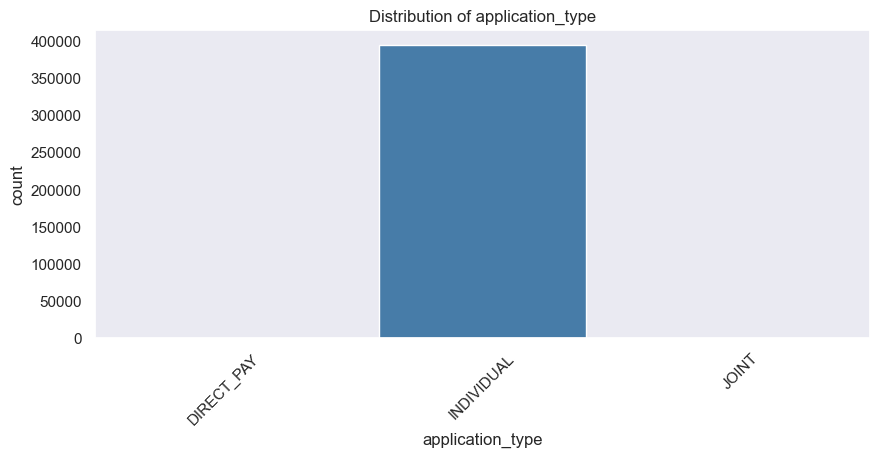

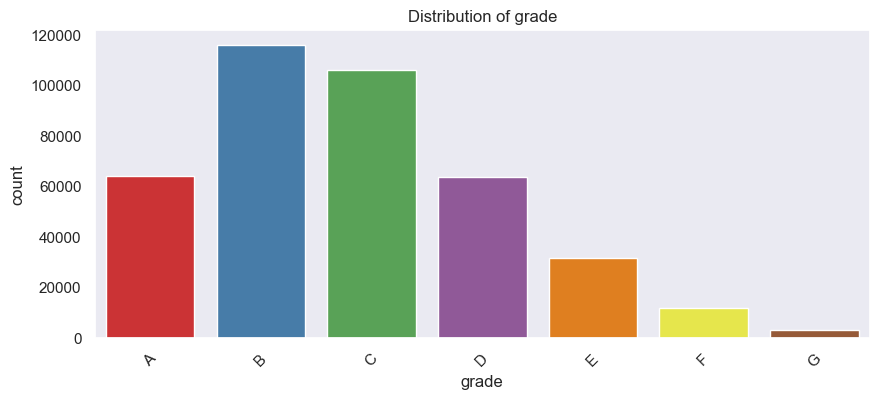

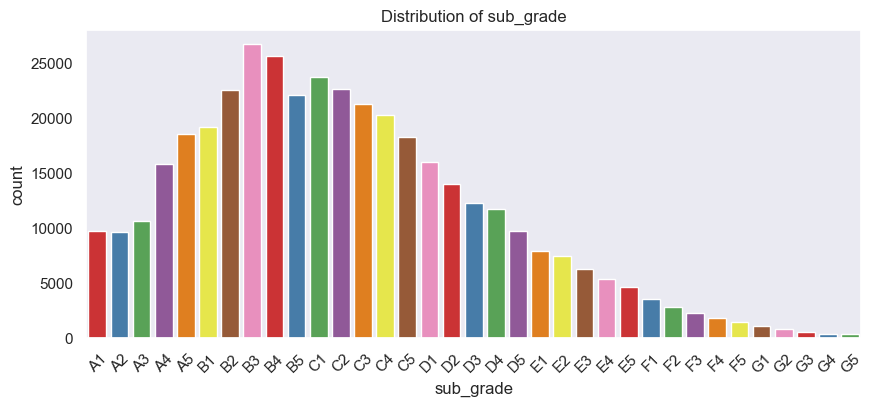

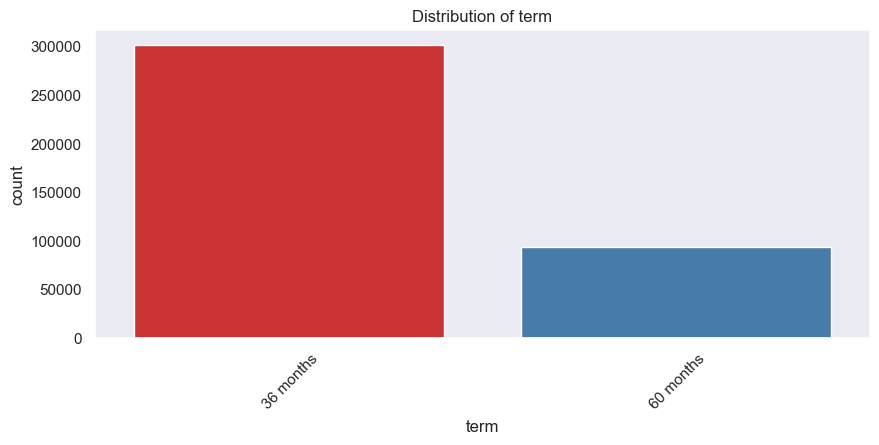

In [25]:
custom_palette = sns.color_palette("Set1", 8)

for i in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.set(style="dark")
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i, palette=custom_palette)
    plt.xticks(rotation=45)
    plt.show()

### Bivarate Analysis

In [26]:
cp = ['blueviolet','darkmagenta','fuchsia','indigo','m','darkviolet','magenta','mediumorchid','violet','purple','orchid','mediumpurple','deeppink']

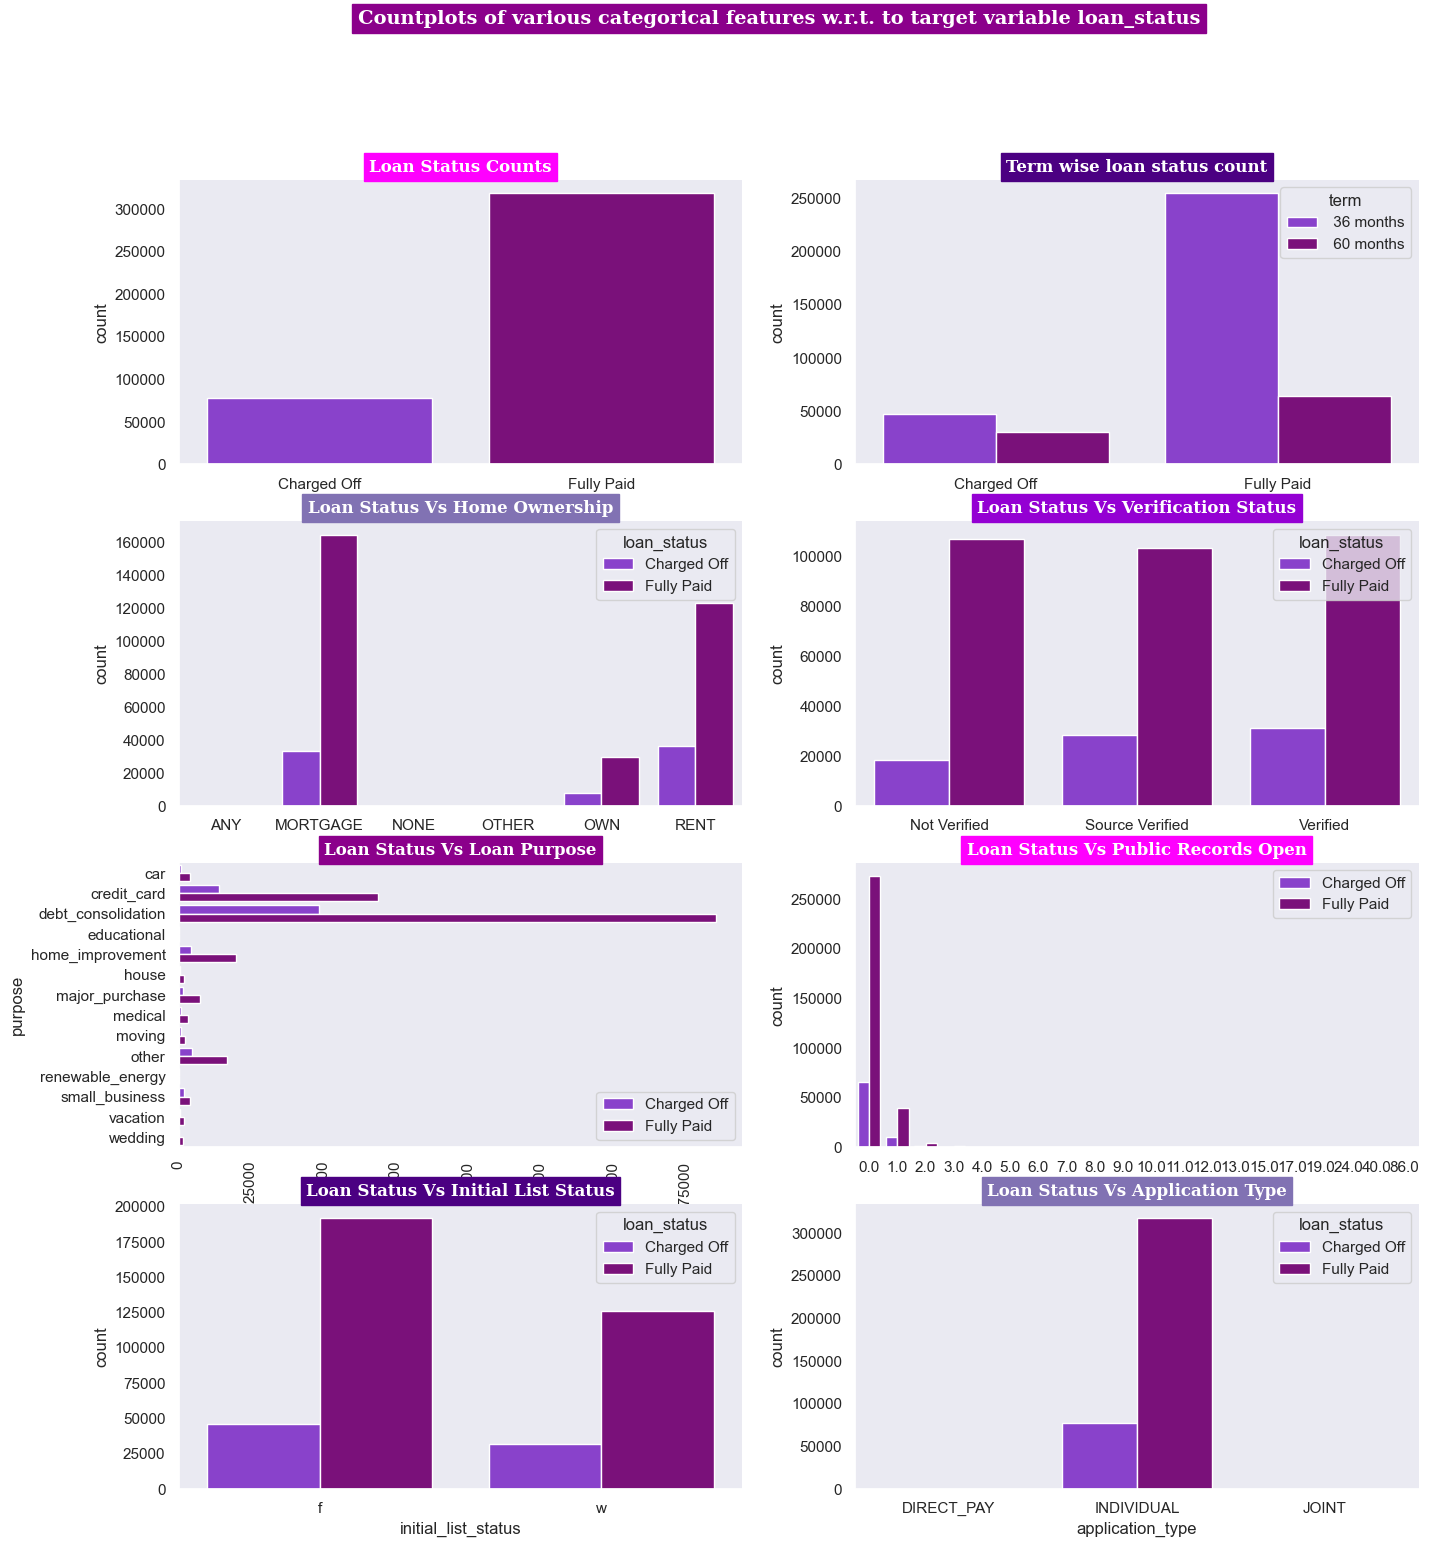

In [27]:
#Countplots of various categorical features w.r.t. to target variable loan_status
plt.figure(figsize=(16,17))
plt.suptitle('Countplots of various categorical features w.r.t. to target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.subplot(421)
sns.countplot(data=df, x='loan_status',palette=cp)
plt.title('Loan Status Counts',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.subplot(422)
sns.countplot(data=df, x='loan_status', hue='term',palette=cp)
plt.title('Term wise loan status count',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.subplot(423)
sns.countplot(data=df, x='home_ownership', hue='loan_status',palette=cp)
plt.title('Loan Status Vs Home Ownership',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[4],color='w')
plt.subplot(424)
sns.countplot(data=df, x='verification_status', hue='loan_status',palette=cp)
plt.title('Loan Status Vs Verification Status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[5],color='w')
plt.subplot(425)
sns.countplot(data=df, y='purpose', hue='loan_status',palette=cp)
plt.xticks(rotation=90)
plt.title('Loan Status Vs Loan Purpose',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.legend(loc=4)
plt.subplot(426)
sns.countplot(data=df, x='pub_rec',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Public Records Open',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.legend(loc=1)
plt.subplot(427)
sns.countplot(data=df, x='initial_list_status', hue='loan_status',palette=cp)
plt.title('Loan Status Vs Initial List Status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.subplot(428)
sns.countplot(data=df, x='application_type',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Application Type',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[4],color='w')
sns.despine()
plt.show()



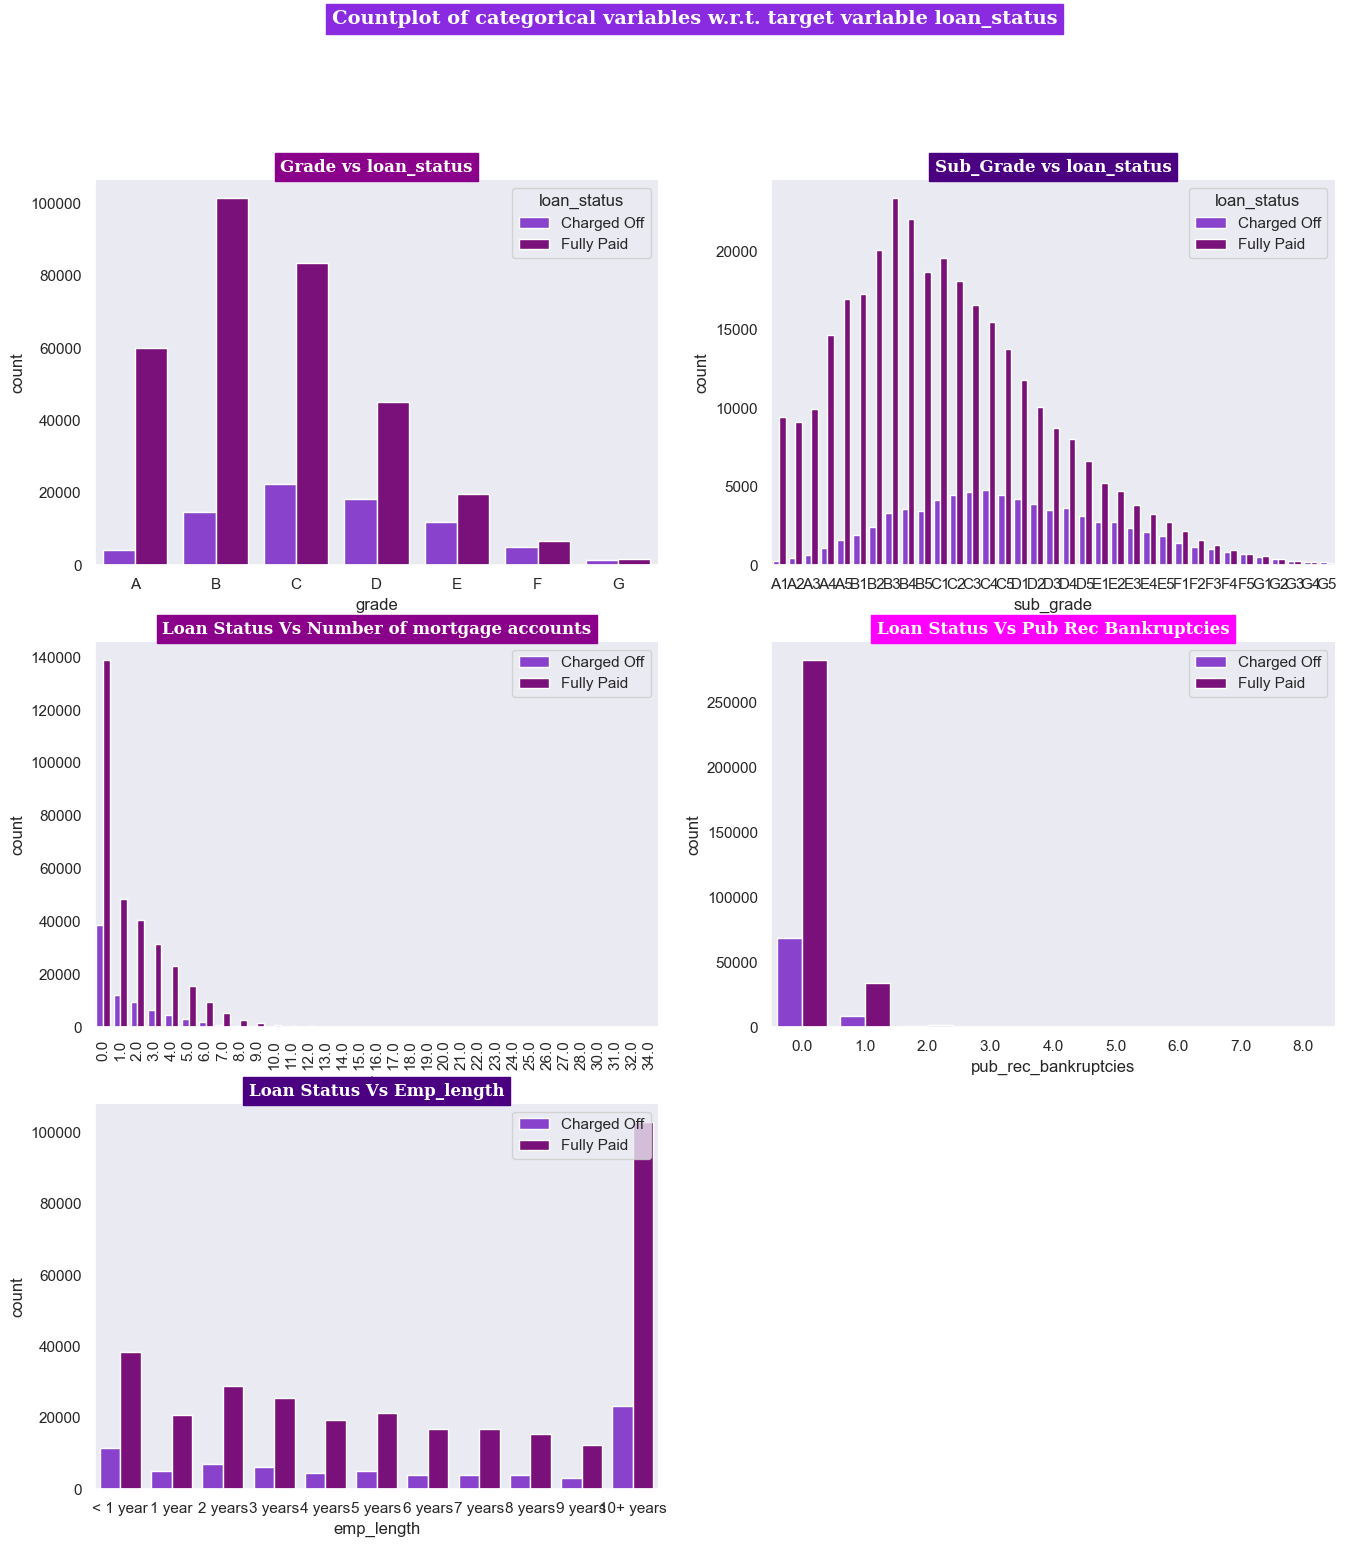

In [28]:
#Countplot for various categorical features w.r.t. target variable loan_status
plt.figure(figsize=(16,17))
plt.suptitle('Countplot of categorical variables w.r.t. target variable loan_status',
             fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor=cp[0],color='w')
plt.subplot(321)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade,palette=cp)
plt.title('Grade vs loan_status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.subplot(322)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade,palette=cp)
plt.title('Sub_Grade vs loan_status',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.subplot(323)
sns.countplot(data=df, x='mort_acc',hue='loan_status',palette=cp)
plt.xticks(rotation=90)
plt.title('Loan Status Vs Number of mortgage accounts',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[1],color='w')
plt.legend(loc=1)
plt.subplot(324)
sns.countplot(data=df, x='pub_rec_bankruptcies',hue='loan_status',palette=cp)
plt.title('Loan Status Vs Pub Rec Bankruptcies',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[2],color='w')
plt.legend(loc=1)
plt.subplot(325)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(data=df, x='emp_length',hue='loan_status',order=order,palette=cp)
plt.title('Loan Status Vs Emp_length',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor=cp[3],color='w')
plt.legend(loc=1)
sns.despine()
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- Most of fully paid is 36 months term
- Mortgage and rent is mostly fully paid
- verfied , not verified and source verified are mostly fully paid
- application type and public record open are mostly fully paid
- number of mortagage account 0 , grade B and C  and more than 10+ years emp_length are fully paid

## 🔖Q2. Comment about the correlation between Loan Amount and Installment features.

In [29]:
df[['loan_amnt', 'installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


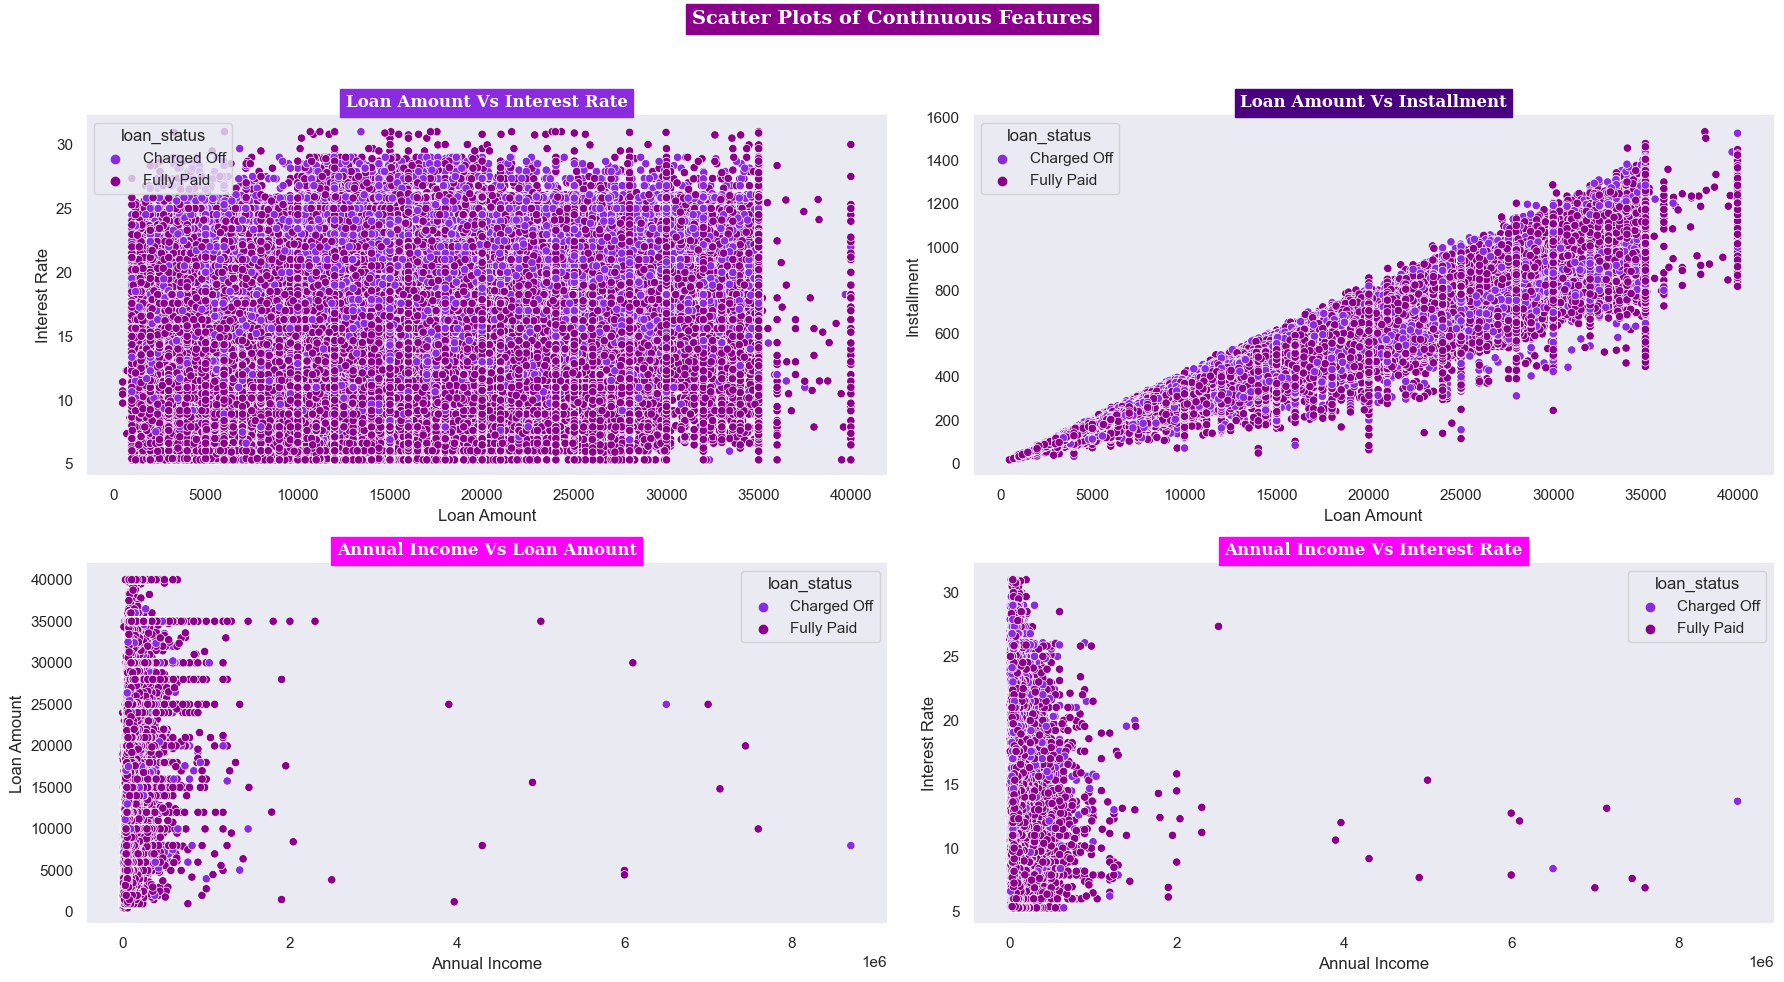

In [30]:
plt.figure(figsize=(18, 10))
plt.suptitle('Scatter Plots of Continuous Features', 
             fontsize=14, fontfamily='serif', fontweight='bold', backgroundcolor=cp[1], color='w')

# Loan Amount vs Interest Rate
plt.subplot(221)
sns.scatterplot(data=df, x='loan_amnt', y='int_rate', hue='loan_status', palette=cp)
plt.title('Loan Amount Vs Interest Rate', fontsize=12, fontfamily='serif', fontweight='bold', 
          backgroundcolor=cp[0], color='w')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')

# Loan Amount vs Installment
plt.subplot(222)
sns.scatterplot(data=df, x='loan_amnt', y='installment', hue='loan_status', palette=cp)
plt.title('Loan Amount Vs Installment', fontsize=12, fontfamily='serif', fontweight='bold', 
          backgroundcolor=cp[3], color='w')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')

# Annual Income vs Loan Amount
plt.subplot(223)
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt', hue='loan_status', palette=cp)
plt.title('Annual Income Vs Loan Amount', fontsize=12, fontfamily='serif', fontweight='bold', 
          backgroundcolor=cp[2], color='w')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

# Annual Income vs Interest Rate
plt.subplot(224)
sns.scatterplot(data=df, x='annual_inc', y='int_rate', hue='loan_status', palette=cp)
plt.title('Annual Income Vs Interest Rate', fontsize=12, fontfamily='serif', fontweight='bold', 
          backgroundcolor=cp[6], color='w')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap with the title
plt.show()


### <span style="color:seagreen"><strong>Insights:</strong></span>

The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient between 'loan_amnt' and 'installment' is quite high, approximately 0.95, indicating a strong positive linear relationship between these two variables.

- **Loan Terms**: Understanding the relationship between loan amount and installment payments is crucial for setting appropriate loan terms. Lenders can adjust loan terms such as interest rates and repayment periods based on the borrower's ability to handle installment payments associated with different loan amounts.

- **Potential Multicollinearity**: When building predictive models, it's essential to be cautious of multicollinearity between highly correlated predictor variables. Multicollinearity can lead to unstable estimates and difficulties in interpreting the model coefficients. Therefore, it might be necessary to address multicollinearity through techniques such as variable selection or regularization.

## 🔖Q3. The majority of people have home ownership as ?

In [31]:
(df['home_ownership'].value_counts(normalize=True)*100).to_frame()

,proportion
home_ownership,
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


### <span style="color:seagreen"><strong>Insights:</strong></span>
- Mortgage holders comprise the majority with approximately `50.08%`, indicating that a significant portion of individuals own homes through `Mortgage` agreements.
- `Renters` constitute a substantial portion, accounting for around `40.35%` of home ownership types. This suggests a sizable demographic of individuals who opt for renting rather than owning a home.

## 🔖Q4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [32]:
pd.crosstab(df['grade'],df['loan_status'], normalize = 'index')

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


### <span style="color:seagreen"><strong>Insights:</strong></span>
> - `True`. **Grade 'A' borrowers demonstrate a significantly high likelihood of fully repaying their loans, with approximately 93.71% of loans being fully paid**. This suggests that borrowers with the highest credit rating are more inclined to fulfill their loan obligations successfully.
- The proportion of charged-off loans for grade 'A' borrowers is relatively low, standing at approximately 6.29%. This indicates a low default rate among borrowers with the highest credit rating, emphasizing their creditworthiness and reliability in loan repayment.

## 🔖Q5. Name the top 2 afforded job titles.

In [33]:
df[df['emp_title'] != 'No Employee Title']['emp_title'].value_counts().to_frame().head()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


In [34]:
df.groupby('emp_title')['loan_status'].count().sort_values(ascending=False).to_frame()[1:6]

,loan_status
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


### <span style="color:seagreen"><strong>Insights:</strong></span>

- The Most afforded job titles are `Teachers & Managers`.

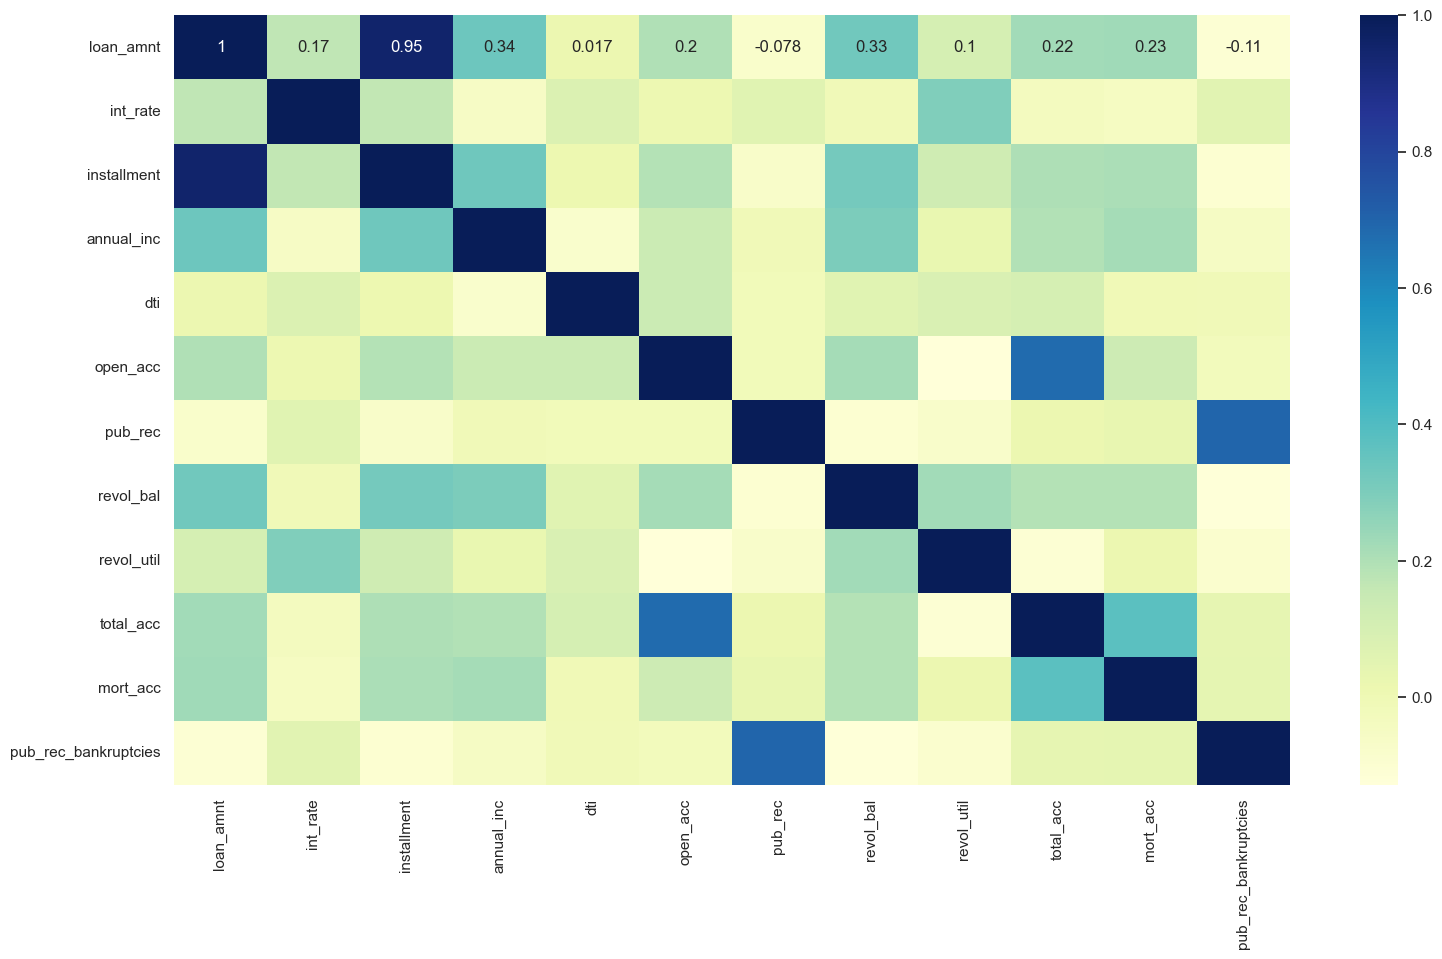

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'YlGnBu', annot = True)
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- There exists a strong correlation between loan_amnt and installment, indicating that higher loan amounts correspond to larger installment payments.
- The variables total_acc and open_acc exhibit a significant correlation.
- There is a notable correlation between pub_rec_bankruptcies and pub_rec.

### Outlier detection and treatment

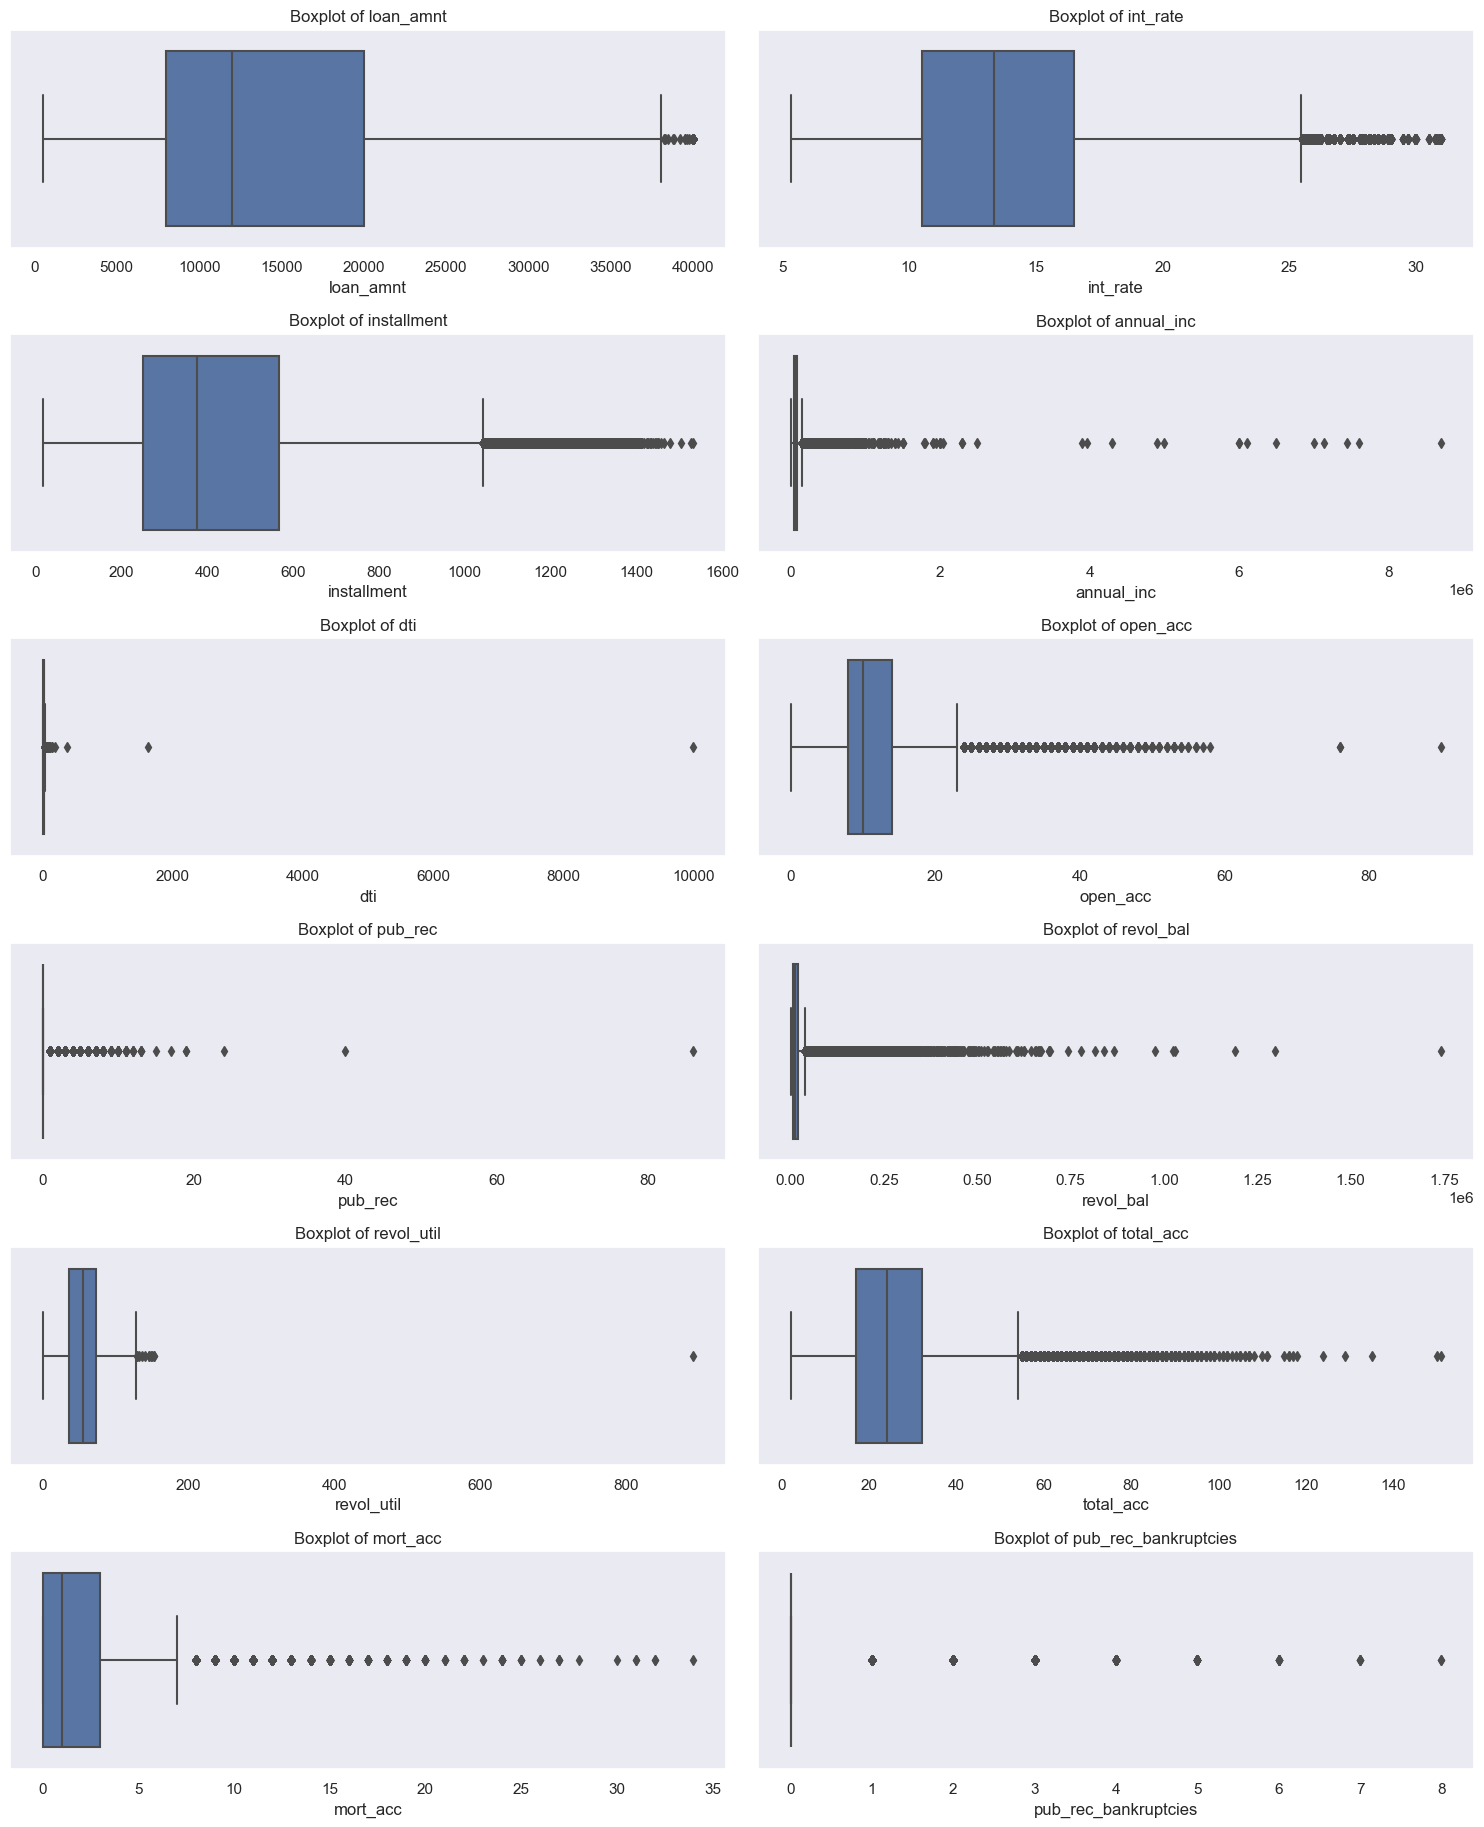

In [36]:
fig = plt.figure(figsize=(15,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- all the columns has outliers
- we have to remove this outliers

In [37]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    
df.shape

(361389, 27)

In [38]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [39]:
df['pub_rec']=df.pub_rec.apply(pub_rec)

df['mort_acc']=df.mort_acc.apply(mort_acc)

df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [40]:
df[['state','zipcode']] = df['address'].str.extract(r'([A-Z]{2}) (\d{5})')
df.drop(['address'], axis=1, inplace=True)

In [41]:
df['state'].nunique() , df['zipcode'].nunique()

(54, 10)

In [42]:
df['state'].isna().sum() , df['zipcode'].isna().sum()

(0, 0)

In [43]:
#Split issue_date into month and year
df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
df.drop(['issue_d'], axis=1, inplace=True)

In [44]:
df['emp_length_yrs'] = df['emp_length'].str.extract('(\d+)')
df.drop(['emp_length'], axis=1, inplace=True)

In [45]:
#Split er_cr_line date into month and year
df[['er_cr_line_m', 'er_cr_line_y']] = df['earliest_cr_line'].str.split('-', expand=True)
df.drop(['earliest_cr_line'], axis=1, inplace=True)

In [46]:
df['term'] = df['term'].str.split().str[0].astype('object')

In [47]:
df['loan_status']=df.loan_status.map({'Fully Paid':1, 'Charged Off':0})

df['initial_list_status']=df.initial_list_status.map({'w':0, 'f':1})

In [48]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[col], df['loan_status']))
    if p > 0.05:
        print('>> Independent feature - Not Significant:',col,' >> p value:',p)

>> Independent feature - Not Significant: emp_title  >> p value: 0.155602399320998
>> Independent feature - Not Significant: title  >> p value: 1.0
>> Independent feature - Not Significant: state  >> p value: 0.845369056269263
>> Independent feature - Not Significant: er_cr_line_m  >> p value: 0.16115865405680704


In [49]:
## dropping cols based on correlation(heatmap,hypothesis testing)
df.drop(columns=['emp_title','title','sub_grade','er_cr_line_m','er_cr_line_y','initial_list_status',
                        'state','issue_month','issue_year','pub_rec','pub_rec_bankruptcies'],axis=1,inplace=True)
df.shape

(361389, 19)

In [50]:
#### Performing OneHotEncoding on feature having multiple variable
dummies=['zipcode', 'grade','purpose','home_ownership','verification_status','application_type']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [51]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,emp_length_yrs,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,117000.0,1,26.24,16.0,36369.0,41.8,25.0,0,10,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
1,8000.0,36,11.99,265.68,65000.0,1,22.05,17.0,20131.0,53.3,27.0,1,4,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,15600.0,36,10.49,506.97,43057.0,1,12.79,13.0,11987.0,92.2,26.0,0,1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
3,7200.0,36,6.49,220.65,54000.0,1,2.60,6.0,5472.0,21.5,13.0,0,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,24375.0,60,17.27,609.33,55000.0,0,33.95,13.0,24584.0,69.8,43.0,1,9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False


## Model

In [52]:
#Prepare X and y dataset i.e. independent and dependent datasets
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [53]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(289111, 49)
(72278, 49)
(289111,)
(72278,)


#### Minmax scaling the data

In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [55]:
X_train.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,emp_length_yrs,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,0.144832,0.0,0.118597,0.147343,0.185214,0.366540,0.423077,0.034012,0.120942,0.438596,1.0,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.218565,0.0,0.131980,0.223556,0.212558,0.230018,0.423077,0.129921,0.423701,0.473684,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.650428,1.0,0.815413,0.595914,0.306006,0.227830,0.384615,0.139315,0.269481,0.368421,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.276498,0.0,0.340102,0.302962,0.177161,0.118145,0.346154,0.151786,0.245942,0.175439,0.0,0.444444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.233706,0.0,0.077065,0.234655,0.197293,0.290694,0.461538,0.209959,0.354708,0.421053,1.0,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [56]:
#Fit the Model on training data
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [57]:
#Predit the data on test dataset
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

In [58]:
logreg_model.score(X_test, y_test) , logreg_model.score(X_test, y_test_pred)

(0.8884999584935942, 1.0)

Train Accuracy : 0.89
Train F1 Score: 0.94
Train Recall Score: 0.99
Train Precision Score: 0.88

Test Accuracy : 0.89
Test F1 Score: 0.93
Test Recall Score: 0.99
Test Precision Score: 0.88


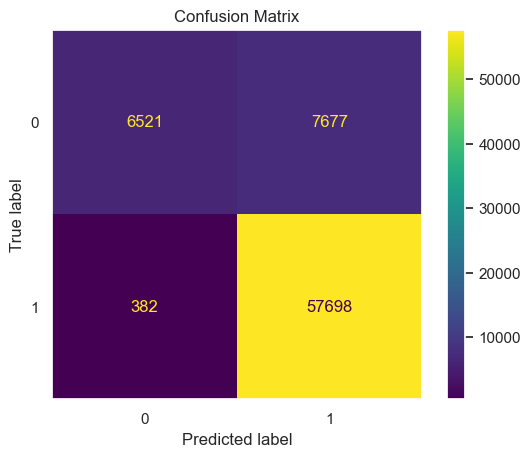

In [59]:
#Model Evaluation
print('Train Accuracy :', logreg_model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,y_train_pred).round(2))
print('Train Recall Score:',recall_score(y_train,y_train_pred).round(2))
print('Train Precision Score:',precision_score(y_train,y_train_pred).round(2))

print('\nTest Accuracy :',logreg_model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,y_test_pred).round(2))
print('Test Recall Score:',recall_score(y_test,y_test_pred).round(2))
print('Test Precision Score:',precision_score(y_test,y_test_pred).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     14198
           1       0.88      0.99      0.93     58080

    accuracy                           0.89     72278
   macro avg       0.91      0.73      0.78     72278
weighted avg       0.89      0.89      0.87     72278



* Here the recall value for the 'charged off' is very low, Hence will build a better model


In [61]:
# Oversampling to balance the target variable

sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 232317
Before OverSampling, count of label 0: 56794
After OverSampling, count of label 1: 232317
After OverSampling, count of label 0: 232317


### <span style="color:seagreen"><strong>Insights:</strong></span>
- In the above plot it is clearly observed that the accuracy of the model is highest with Hyperparameter C=100.
- If we try to tune it further with values w.r.t 100 we can increase accuracy of the model further

Train Accuracy : 0.8
Train F1 Score: 0.87
Train Recall Score: 0.8
Train Precision Score: 0.94

Test Accuracy : 0.8
Test F1 Score: 0.86
Test Recall Score: 0.8
Test Precision Score: 0.94


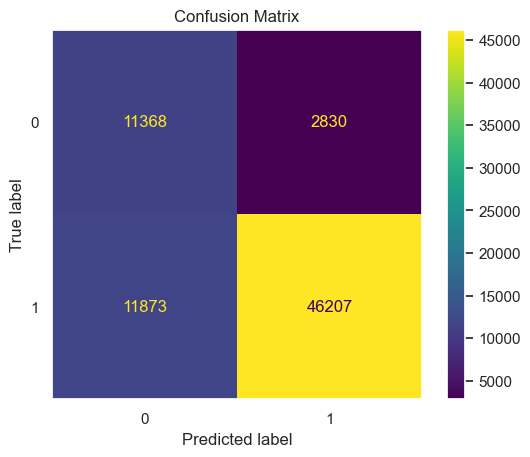

In [62]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

#Model Evaluation
print('Train Accuracy :', model.score(X_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(X_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [63]:
y_pred = test_preds
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61     14198
           1       0.94      0.80      0.86     58080

    accuracy                           0.80     72278
   macro avg       0.72      0.80      0.74     72278
weighted avg       0.85      0.80      0.81     72278



### <span style="color:seagreen"><strong>Insights:</strong></span>

- The model demonstrates a high recall score, successfully identifying 80% of actual defaulters.
- However, the precision for the positive class (defaulters) is low; only 47% of predicted defaulters are actually defaulters.
- This high recall and low precision indicate that while the model is effective at flagging most defaulters, it also results in many false positives. Consequently, many deserving customers may be denied loans.
- The low precision adversely affects the F1 score, reducing it to 60%, despite an overall accuracy of 80%. This highlights the trade-off between precision and recall in the model's performance.
> Explanation :
- The model is good at catching most people who don't pay back their loans it catches 80% of them.
- But, when it says someone won't pay back, it's right only half of the time.47% So, there's a chance it's making mistakes and wrongly flagging people.
- Because of these mistakes, some people who deserve loans might not get them.
- Even though the model seems okay overall, its balance between being right and not making mistakes isn't great. It's like a seesaw; when one side goes up, the other goes down.

### 🏷️Regularization Model

In [64]:
#Try with different regularization factor lamda and choose the best to build the model
lamb = np.arange(0.01, 10000, 10)

train_scores = []
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)

    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)

    train_scores.append(tr_score)
    test_scores.append(te_score)

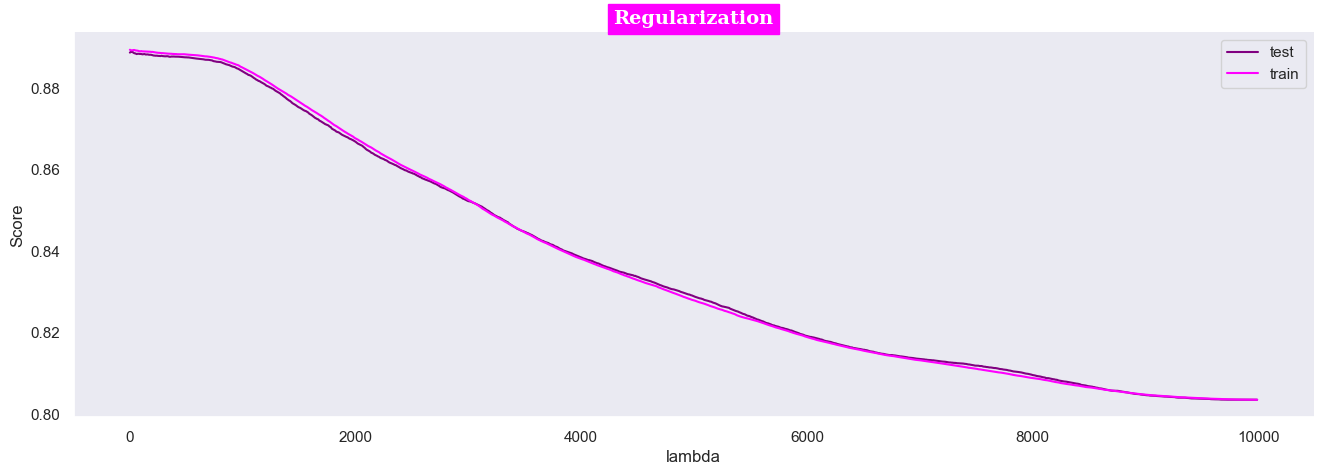

In [65]:
#Plot the train and test scores with respect lambda values i.e. regularization factors
ran = np.arange(0.01, 10000, 10)
plt.figure(figsize=(16,5))
sns.lineplot(x=ran,y=test_scores,color='purple',label='test')
sns.lineplot(x=ran,y=train_scores,color='magenta',label='train')
plt.title('Regularization',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='magenta',color='w')
plt.xlabel("lambda")
plt.ylabel("Score")
sns.despine()
plt.show()

In [66]:
#Check the index of best test score and the check the best test score

print(np.argmax(test_scores))
print(test_scores[np.argmax(test_scores)])

2
0.8889288580204211


In [67]:
#Calculate the best lambda value based on the index of best test score

best_lamb = 0.01 + (10*2)
best_lamb

20.01

In [68]:
#Fit the model using best lambda

reg_model = LogisticRegression(C=1/best_lamb)
reg_model.fit(X_train, y_train)

LogisticRegression(C=0.04997501249375312)

In [69]:
#Predict the y_values and y_probability values

y_reg_pred = reg_model.predict(X_test)
y_reg_pred_proba = reg_model.predict_proba(X_test)

In [70]:
#Print model score

print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(model.score(X_test, y_test)*100,2),'%')

Logistic Regression Model Score with best lambda: 80.36 %


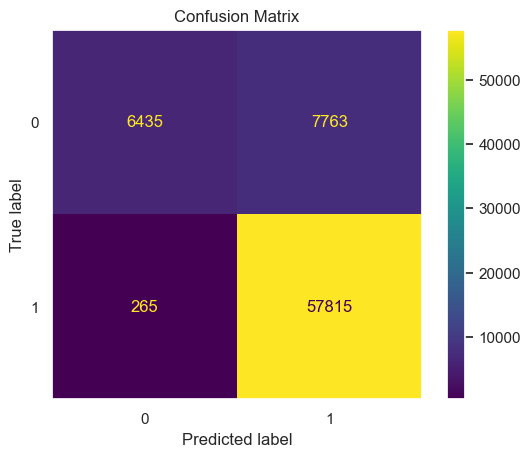

In [71]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_reg_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [72]:
print(classification_report(y_test, y_reg_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     14198
           1       0.88      1.00      0.94     58080

    accuracy                           0.89     72278
   macro avg       0.92      0.72      0.78     72278
weighted avg       0.90      0.89      0.87     72278



### <span style="color:seagreen"><strong>Insights:</strong></span>
> Regularized model

* `Precision : 89%`  
* `Recall : 100%`
* `F1-score : 94%`
* `Accuracy : 89%`




## 🔹**K-fold - Cross_validation**

- cross validation accuracy has to be approx 89%

In [73]:
x=scaler.fit_transform(X)

kfold = KFold(n_splits=10)
accuracy = np.mean(cross_val_score(reg_model,x,y,cv=kfold,scoring='accuracy'))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.889


In [74]:
cm = confusion_matrix(y_test, y_reg_pred)
cm_df = pd.DataFrame(cm, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_df

,Defaulter,Fully paid
Defaulter,6435,7763
Fully paid,265,57815


### <span style="color:seagreen"><strong>Insights:</strong></span>

* TN = 6435 (True Negative: Correctly predicted Charged Off)
* TP = 57815 (True Positive: Correctly predicted Fully Paid)
* FP = 7763 (False Positive: Predicted Fully Paid but actually Charged Off)
* FN = 265 (False Negative: Predicted Charged Off but actually Fully Paid)
* Actual Negative (Charged Off) = 6435 + 7763 = 14198
* Actual Positive (Fully Paid) = 265 + 57815 = 58080
* Predicted Negative (Charged Off) = 6435 + 265 = 6700
* Predicted Positive (Fully Paid) = 7763 + 57815 = 65578

In [75]:
#Collect the model coefficients and print those in dataframe format
coeff_df = pd.DataFrame()
coeff_df['Features'] = X_train_res.columns
coeff_df['Weights'] = model.coef_[0]
coeff_df['ABS_Weights'] = abs(coeff_df['Weights'])
coeff_df = coeff_df.sort_values(['ABS_Weights'], ascending=False)
coeff_df

,Features,Weights,ABS_Weights
13,zipcode_11650,-0.542748,0.542748
20,zipcode_93700,-0.540316,0.540316
19,zipcode_86630,-0.535109,0.535109
15,zipcode_29597,0.449518,0.449518
12,zipcode_05113,0.447415,0.447415
1,term,-0.345605,0.345605
2,int_rate,-0.307843,0.307843
24,grade_E,-0.200801,0.200801
23,grade_D,-0.189621,0.189621
21,grade_B,0.184333,0.184333


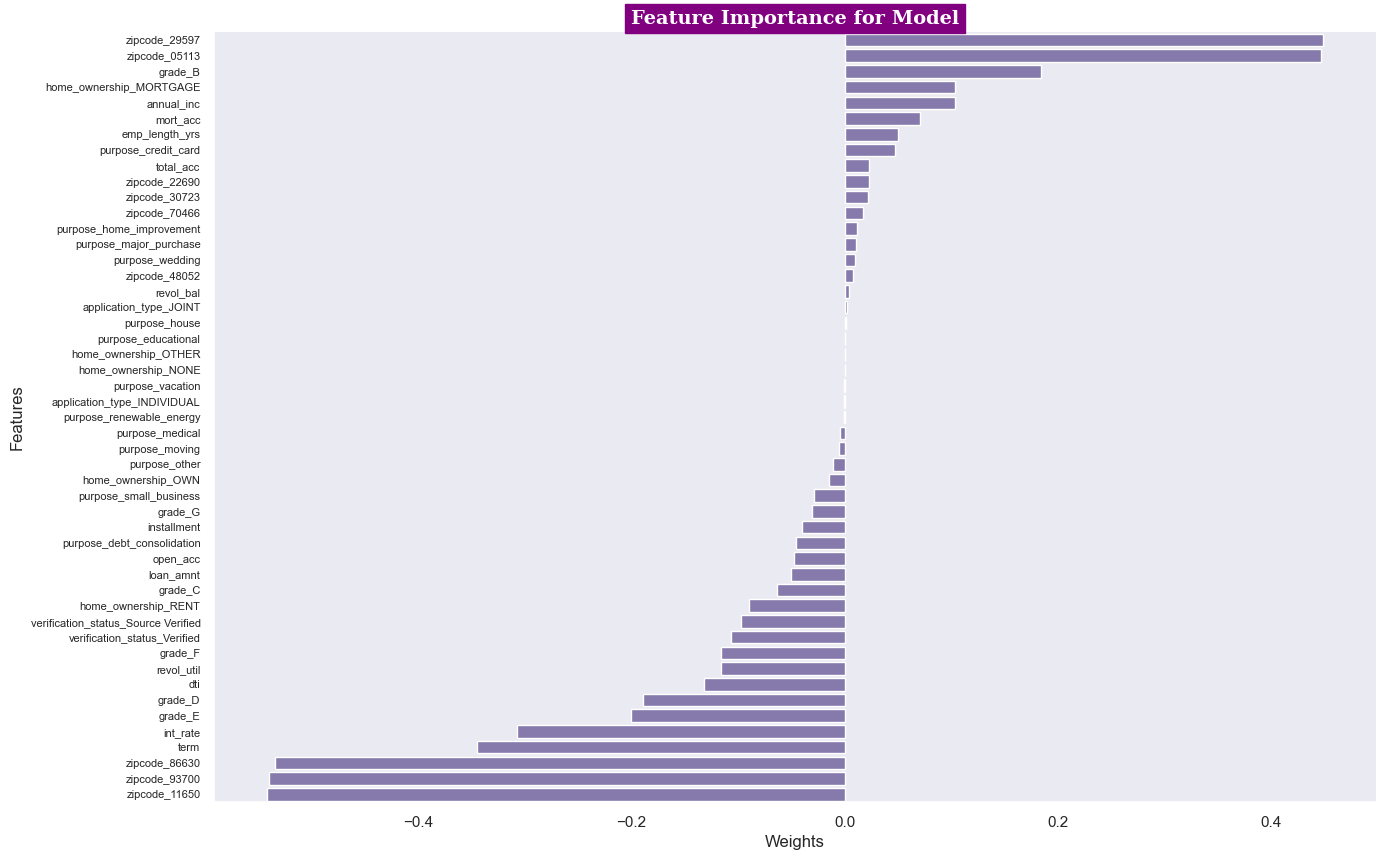

In [76]:
imp_feature = coeff_df.sort_values(by='Weights',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y = imp_feature['Features'],
           x = imp_feature['Weights'],color='m')
plt.title("Feature Importance for Model",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.xlabel("Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

In [77]:
#Logistic Regression model intercept

model.intercept_

array([1.72051824])

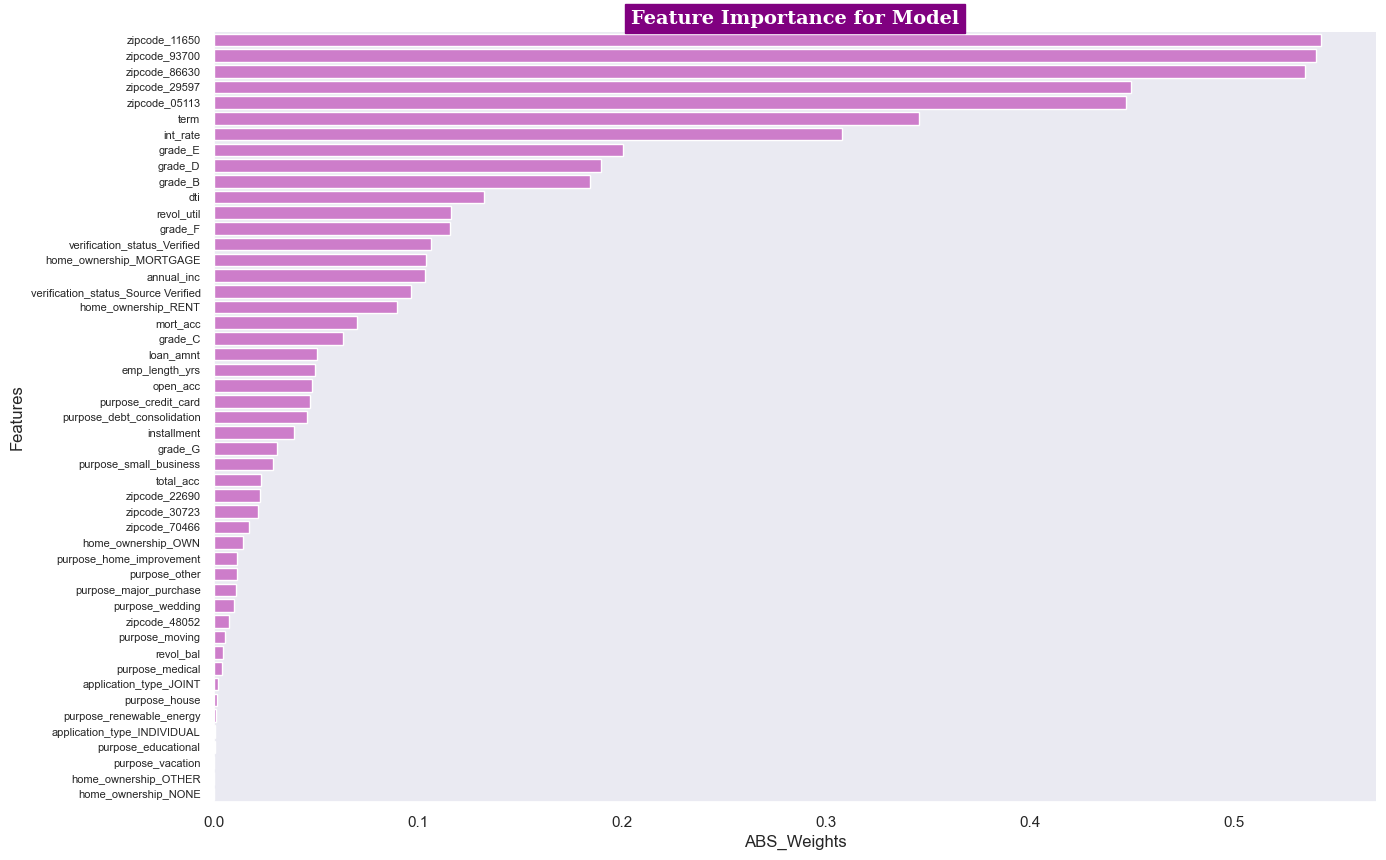

In [78]:
plt.figure(figsize=(15,10))
sns.barplot(y = coeff_df['Features'],x = coeff_df['ABS_Weights'],color='orchid')
plt.title("Feature Importance for Model",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.xlabel("ABS_Weights")
plt.yticks(fontsize=8)
plt.ylabel("Features")
sns.despine()
plt.show()

### <span style="color:seagreen"><strong>Insights:</strong></span>
- The model has assigned significant weight to the zip_code, Annual Income, grade features, indicating that certain zip codes strongly influence the prediction of defaulters.
- Features such as dti (debt-to-income ratio), open_acc (number of open accounts), and loan_amnt (loan amount) also have high positive coefficients, highlighting their importance in predicting default risk.
- On the other hand, several zip codes have large negative coefficients, suggesting that they are associated with a lower likelihood of default.


### ROC AUC curve

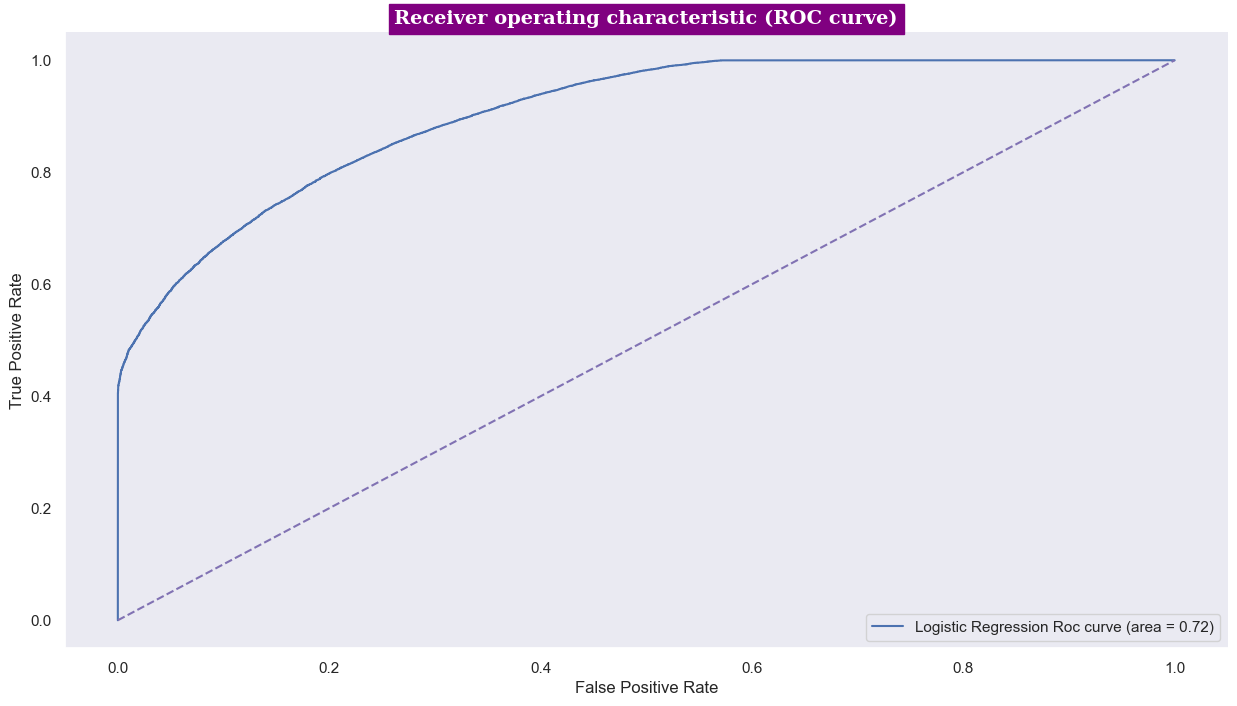

In [79]:
# area under ROC curve
logit_roc_auc = roc_auc_score(y_test,y_reg_pred)

# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_reg_pred_proba[:,1])

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label='Logistic Regression Roc curve (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'m--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='purple',color='w')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [80]:
logit_roc_auc

0.7243350887604159

In [81]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9025789035102526

### <span style="color:seagreen"><strong>Insights:</strong></span>

**Trade-off in Performance**: The ROC curve area, representing model performance, is 72%. This indicates that the model effectively distinguishes between classes 72% of the time.

- Ideally, we aim for a higher True Positive Rate (TPR) and a lower False Positive Rate (FPR) to ensure accurate predictions.

- The ROC curve illustrates that as True Positives increase, there's a simultaneous increase in False Positives.

- Misclassification: This trade-off implies that while identifying more Fully Paid customers, there's a heightened risk of misclassifying Charged Off customers as Fully Paid, potentially leading to Non-Performing Assets (NPAs).

These points emphasize the need to mitigate this risk:

- Reducing FPR while maintaining TPR is crucial to minimize misclassifications and associated risks.
- By shifting False Positives towards the left on the ROC curve, the model's overall performance, as measured by AUC, can improve.
- This improvement in AUC relies on maintaining a high True Positive Rate while reducing False Positives.

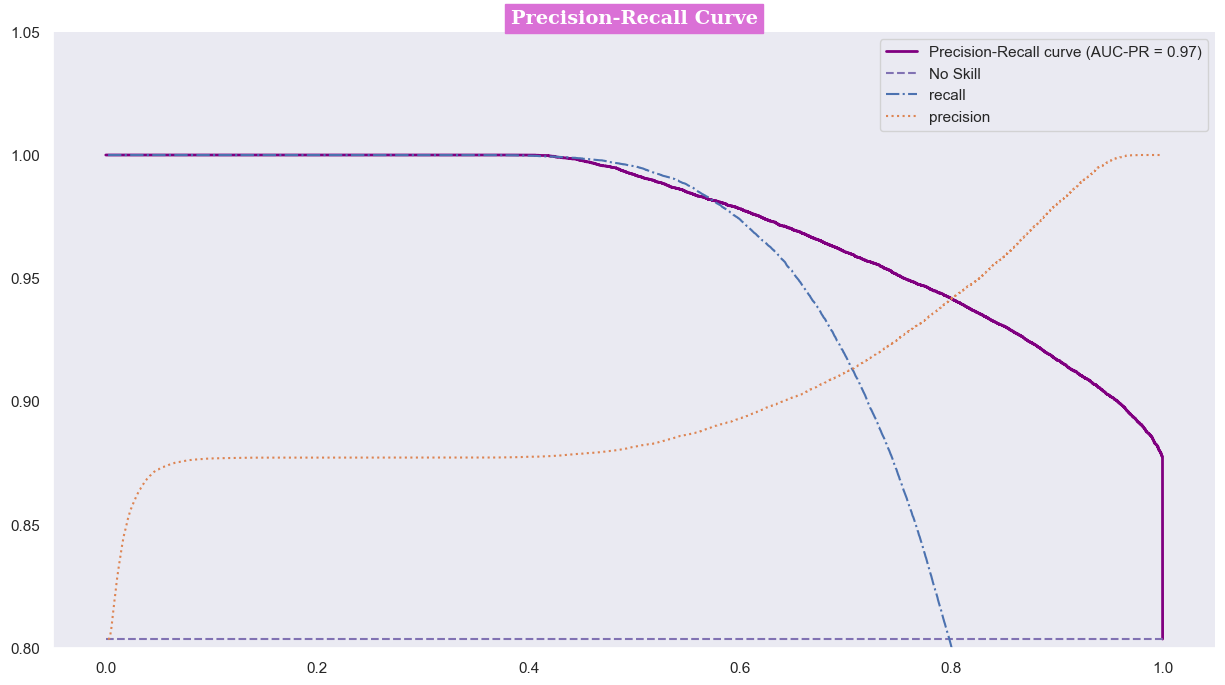

In [82]:
precision, recall, thresholds = precision_recall_curve(y_test, y_reg_pred_proba[:,1])

average_precision = average_precision_score(y_test, y_reg_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(15,8))
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AUC-PR = {average_precision:.2f})')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='m')
plt.plot(thresholds, recall[0:thresholds.shape[0]], label='recall',linestyle='-.')
plt.plot(thresholds, precision[0:thresholds.shape[0]], label='precision',linestyle='dotted')
# plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.05])
plt.title('Precision-Recall Curve',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='orchid',color='w')
plt.legend(loc='upper right')
sns.despine()
plt.show()

In [83]:
auc(recall, precision).round(3)

0.973

### <span style="color:seagreen"><strong>Insights:</strong></span>

* The Area Under the Curve (AUC) for the precision-recall curve is 0.975. This high AUC value suggests that the model achieves excellent performance in distinguishing between positive and negative classes, showcasing strong precision-recall characteristics.

- **Precision-Recall Curve Superiority**: Precision-recall curves are pivotal, especially in imbalanced datasets, focusing on accurate predictions of the relevant class (Class 1 - Fully paid in this case).

- **Irrelevance of True Negatives**: Precision and recall computations disregard true negatives, simplifying focus to the correct prediction of Fully Paid customers.

- **AUC Strengthens Model Evaluation**: A high AUC (97.5%) underscores the model's robustness in distinguishing between classes, indicating its efficacy.

- **Precision Enhancement Priority**: Optimal model refinement centers on elevating precision by minimizing False Positives, vital for improving overall performance and mitigating risks.

In [84]:
# balenced Model
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

lr_model = lr.fit(X_train, y_train)

print(classification_report(y_test, lr_model.predict(X_test)))

cm_bal = confusion_matrix(y_test, lr_model.predict(X_test))
cm_bal_df = pd.DataFrame(cm_bal, index=['Defaulter','Fully paid'], columns=['Defaulter','Fully paid'])
cm_bal_df

              precision    recall  f1-score   support

           0       0.49      0.80      0.61     14198
           1       0.94      0.79      0.86     58080

    accuracy                           0.80     72278
   macro avg       0.72      0.80      0.73     72278
weighted avg       0.85      0.80      0.81     72278



,Defaulter,Fully paid
Defaulter,11423,2775
Fully paid,11975,46105


#### 💡Observations from classification report:
> Balenced model

* `Precision : 94%`  
* `Recall : 79%`
* `F1-score : 86%`
* `Accuracy : 80%`

### <span style="color:seagreen"><strong>Insights:</strong></span>

- TN = 11423 (True Negative: Correctly predicted Charged Off)
- TP = 46105 (True Positive: Correctly predicted Fully Paid)
- FP = 2775 (False Positive: Predicted Fully Paid but actually Charged Off)
- FN = 11975 (False Negative: Predicted Charged Off but actually Fully Paid)
- Actual Negative (Charged Off) = 11423 + 2775 = 14198
- Actual Positive (Fully Paid) = 11975 + 46105 = 58080
- Predicted Negative (Charged Off) = 11423 + 11975 = 23398
- Predicted Positive (Fully Paid) = 2775 + 46105 = 48880

In [85]:
lr_model.intercept_

array([7.9133883])

## 🔖Q6: Thinking from a bank's perspective, which metric should our primary focus be on..
a. ROC AUC  
b. Precision  
c. Recall  
d. F1 Score  

Ans:
> From a bank's perspective, minimizing risks and maximizing profitability are paramount. `ROC AUC (Receiver Operating Characteristic Area Under Curve)` is indeed a crucial metric because it encompasses both True Positive Rate (TPR) and False Positive Rate (FPR)

* Bank's primary focus should be on ROC AUC , because bank needs to reduce FPR (False Positive Rate) and needs to increase the TPR (True Positive Rate).

- Maximizing TPR ensures that the bank correctly identifies customers who fully pay their loans (reducing False Negatives), while minimizing FPR ensures that the bank doesn't wrongly classify customers as fully paid when they're actually charged off (reducing False Positives).

- By optimizing ROC AUC, the bank can strike a balance between correctly identifying creditworthy customers and minimizing the risk of defaulters, thereby enhancing the overall performance and reliability of its credit scoring model.

####  **Another approach**:
* since I'm having `High Recall` value of 100% in Regularized model(most efficient model:
> From a bank's perspective, the primary focus should be on minimizing risks while maximizing profitability. Therefore, the most relevant metric would be **Precision**.

- Precision represents the proportion of correctly predicted positive instances (e.g., customers who fully pay their loans) out of all instances predicted as positive. In the context of a bank, precision reflects the accuracy of identifying creditworthy customers who are likely to repay their loans. Maximizing precision ensures that the bank minimizes the number of false positives, which are instances where the bank incorrectly identifies customers as creditworthy when they are not. By prioritizing precision, the bank can reduce the risk of loan defaults and associated financial losses.

- While ROC AUC, Recall, and F1 Score are also important metrics, precision aligns closely with the bank's objective of minimizing risks and ensuring the quality of its loan portfolio.

## 🔖Q7. How does the gap in precision and recall affect the bank?

> Ans:

- To comprehend the errors made by a model, it's crucial to evaluate both false positives and false negatives, which are gauged through metrics like recall and precision. When recall is low, it poses a significant risk for the bank.
- So, the gap between precision and recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.
- Good precision means less False Positives. i.e. Less NPA loan accounts.
- Good recall means less False Negatives. i.e. not loosing on good customer.

## 🔖Q8. Which were the features that heavily affected the outcome?

> Ans:

- `Address(Zipcode), Annual_Income, Grade`  seems to be most important feature in our case.

- Loan duration `term`, Total Credit balance `revol_bal`, : Monthly debt vs. monthly income ratio `dti`, Interest `int_rate` also has high weights(coeffients) in the model .


## 🔖Q9. Will the results be affected by geographical location? (Yes/No)

> Ans:
- Yes,  we can see that zip_code (Address) is a very important feature so geographical location has impact on our result.

------

## 📣💰⚡<span style="color:darkorchid"><strong>Business Recommendations for LoanTap</strong></span>⚡💰📣


> <span style="color:magenta"><strong>Optimize Loan Approval Strategy:</strong></span>
   - Focus on maximizing the F1 score and area under the Precision-Recall Curve to effectively manage the precision-recall trade-off. This ensures identifying most defaulters while reducing false positives, enhancing risk management.


> <span style="color:magenta"><strong>Model Improvement:</strong></span>
   - Consider using more complex classifiers like Random Forests or XGBoost and perform hyperparameter tuning to enhance model performance and capture intricate relationships in the data.


> <span style="color:magenta"><strong>Cross-Validation:</strong></span>
   - Employed stratified k-fold cross-validation to ensure representative distribution of minority class in each fold, providing reliable estimates of model performance.


> <span style="color:magenta"><strong>Policy Adjustments Based on Insights</strong></span>
   - Scrutinize loans with lower grades more rigorously and consider adjusting interest rates to compensate for higher risk.
   - Implement targeted strategies for high-risk zip codes, such as additional verification steps or higher interest rates.
   - Evaluate small business loans with additional financial health checks and collateral requirements to mitigate default risk.

By implementing these recommendations, LoanTap can enhance their loan approval process, minimize the risk of NPAs, and ensure sustainable growth and financial stability.

------